In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import numpy as np

In [ ]:
#Парсинг сайта в соответствии с разными пользователями

In [2]:
def get_html(url):
    r = requests.get(url)
    return r.text

def get_total_pages(html):
    response = requests.get(html)
    html = response.text
    soup = BeautifulSoup(html, 'lxml')
    try:
        pages = soup.find('div',class_="col-main").find('nav',class_='pagination').find_all('li', class_='pagination-page')[-1].find('a').text
    except:
        pages = 1
    return(int(pages))
    

def write_csv(data,user):
    with open('lastfm_'+user+'.csv', 'a', encoding = 'Utf-8') as f:
        writer = csv.writer(f)
        writer.writerow((data['song'],
                         data['artist'],
                         data['my_scrobbles'],
                         data['song_listeners'],
                         data['song_scrobbles'],
                         data['length'],
                         data['ganre'],
                         data['country'],
                         data['age'],
                         data['group'],
                         data['artist_listeners'],
                         data['artist_scrobbles']))
        
def get_page_data(html,user):
    url_base = 'https://www.last.fm'
    soup = BeautifulSoup(html, 'lxml')
    divs = soup.find('div', class_ = 'container')
    table = soup.find('table', class_ = "chartlist")
    table_body = table.find('tbody')
    rows = table_body.find_all('tr')
    for row in rows:
        try:
            song = row.find('td', class_='chartlist-name').find_all('a')[0].text
            artist =  row.find('td', class_='chartlist-artist').find_all('a')[0].text
            my_scrobbles = int(row.find('td', class_ = 'chartlist-bar').find_all('span')[0].find_all('a')[0].find_all('span')[1].text.split('\n')[4].split(' ')[-2])
            link_to_song = url_base+str(row.find('td', class_='chartlist-name').find_all('a')[0]).split(' ')[2][6:-1]
            response = requests.get(link_to_song)
            link_to_song = response.text
            soup_song = BeautifulSoup(link_to_song, 'lxml')
            song_listeners = int(str(soup_song.find_all('div',class_="header-metadata-tnew-display")[0].find_all('p')[0]).split('<')[2].split('"')[3].replace(',',''))
            song_scrobbles = int(str(soup_song.find_all('div',class_="header-metadata-tnew-display")[1].find_all('p')[0]).split('<')[2].split('"')[3].replace(',',''))
            try:
                length = str(soup_song.find('div',class_="metadata-column").find('dl',class_='catalogue-metadata').find('dd',class_="catalogue-metadata-description").text).split('\n')[1].split(' ')[-1]
                length = float(length.split(':')[0])+float(length.split(':')[1])/60.0
            except:
                length = 0
            ganre = soup_song.find('div',class_='section-with-separator').find_all('a')[0].text
            link_to_artist = url_base+ str(row.find('td', class_='chartlist-artist').find_all('a')[0]).split(' ')[1][6:-1]
            response = requests.get(link_to_artist)
            link_to_artist = response.text
            soup_artist = BeautifulSoup(link_to_artist, 'lxml')
            try:
                country = str(soup_artist.find('div',class_="metadata-column").find('dl',class_='catalogue-metadata').find_all('dd',"catalogue-metadata-description")[1].text)
            except:
                country = '0'
            try:
                if (str(soup_artist.find('div',class_="metadata-column").find('dl',class_='catalogue-metadata').find('dt',"catalogue-metadata-heading").text) == 'Years Active') or (str(soup_artist.find('div',class_="metadata-column").find('dl',class_='catalogue-metadata').find_all('dt',"catalogue-metadata-heading")[1].text) == 'Founded In'):
                    group = 'band'
                else:
                    group = 'solo'
            except:
                group = '0'
            try:
                if group != 'solo':
                    age = str(soup_artist.find('div',class_="metadata-column").find('dl',class_='catalogue-metadata').find_all('dd',"catalogue-metadata-description")[0].text).split('(')[1].split(' ')[0]
                else:
                    age = str(soup_artist.find('div',class_="metadata-column").find('dl',class_='catalogue-metadata').find_all('dd',"catalogue-metadata-description")[0].text).split('(')[1].split(' ')[1][:-1]
            except:
                age = 0
            print(age)
            artist_listeners = int(str(soup_artist.find_all('div',class_="header-metadata-tnew-display")[0].find_all('p')[0]).split('<')[2].split(' ')[3].split('"')[1].replace(',',''))
            artist_scrobbles = int(str(soup_artist.find_all('div',class_="header-metadata-tnew-display")[1].find_all('p')[0]).split('<')[2].split(' ')[3].split('"')[1].replace(',',''))
            data = {
                'song':song,
                'artist':artist,
                'my_scrobbles':my_scrobbles,
                'song_listeners':song_listeners,
                'song_scrobbles':song_scrobbles,
                'length':length,
                'ganre':ganre,
                'country':country,
                'age':age,
                'group':group,
                'artist_listeners':artist_listeners,
                'artist_scrobbles':artist_scrobbles}
            write_csv(data,user)
        except:
            continue
        
def main():
    url = 'https://www.last.fm/user/'
    user = 'Ankha_Vill' #kras_veta #levavolchansky
    url = url+user+'/library/tracks?page='
    pages = get_total_pages(url+'1')
    print(pages)
    for i in range(1,30):
        response = requests.get(url+str(i))
        html = response.text
        print('parsing page: ',i)
        get_page_data(html,user)

In [3]:
if __name__ == '__main__':
    main()

34
parsing page:  1
5
2
0
4
5
0
4
4
1
4
2
2
26
1
2
2
0
2
2
4
5
24
4
4
2
4
46
4
0
4
2
25
2
2
0
0
4
0
5
25
2
4
3
3
25
2
parsing page:  2
5
2
0
24
24
5
2
4
31
0
25
2
0
6
4
6
5
3
3
5
5
0
3
4
4
4
27
3
0
0
9
4
0
0
7
1
41
8
5
4
31
5
7
30
27
4
parsing page:  3
4
0
9
0
5
5
0
0
0
31
31
15
5
3
0
4
4
6
0
40
31
6
4
13
24
0
0
0
6
31
31
31
30
4
24
5
0
26
0
9
4
3
0
31
13
13
27
5
parsing page:  4
25
0
26
26
0
22
15
31
11
13
4
4
4
7
5
3
26
26
26
9
4
6
6
6
2
0
30
22
28
11
31
31
32
9
4
5
0
0
0
3
6
6
6
4
24
26
parsing page:  5
26
44
4
5
3
1
31
31
5
8
3
4
31
0
30
13
13
0
4
23
5
0
5
0
0
4
48
11
0
9
0
24
6
32
22
7
3
5
13
13
27
9
7
36
28
13
parsing page:  6
0
4
25
8
0
0
6
26
0
5
6
9
4
4
0
0
19
17
17
3
1
0
0
0
1
28
5
15
11
31
31
31
31
31
5
5
5
1
2
13
13
13
13
27
9
0
4
4
parsing page:  7
32
26
0
3
0
26
26
0
34
4
4
0
16
2
2
0
30
28
40
25
31
31
31
31
5
4
28
0
0
0
2
11
15
15
15
10
13
13
13
23
24
5
5
0
4
26
26
4
20
3
parsing page:  8
6
6
26
26
26
31
5
34
44
9
9
4
4
4
4
0
28
24
6
6
9
5
16
0
0
21
5
31
31
31
31
31
31
3

In [8]:
data1 = pd.read_csv('lastfm1_kras_veta.csv',  names=['song',
                         'artist',
                         'my_scrobbles',
                         'song_listeners',
                         'song_scrobbles',
                         'length',
                         'ganre',
                         'country',
                         'age',
                         'group',
                         'artist_listeners',
                         'artist_scrobbles'])

In [9]:
data1.head()

,song,artist,my_scrobbles,song_listeners,song_scrobbles,length,ganre,country,age,group,artist_listeners,artist_scrobbles
0,LA DI DA,Everglow,172,71546,1527899,0.00,k-pop,"Seoul, Korea, Republic of",2,band,138977,7515448
1,+HWA+,CL,133,17968,143665,0.00,k-pop,"Seoul, Korea, Republic of",29,solo,135860,2891967
2,NUNU NANA,Jessi,126,39340,358556,3.25,hip hop,"New York, New York, United States",32,solo,71284,1079477
3,Stay,BTS,117,79881,6510110,0.00,k-pop,"Seoul, Korea, Republic of",7,band,577790,572044398
4,Lovesick Girls,BLACKPINK,95,142923,4138355,0.00,k-pop,"Seoul, Korea, Republic of",4,band,440990,59148559


In [10]:
data1.shape

(1095, 12)

In [11]:
data2 = pd.read_csv('lastfm_levavolchansky.csv',  names=['song',
                         'artist',
                         'my_scrobbles',
                         'song_listeners',
                         'song_scrobbles',
                         'length',
                         'ganre',
                         'country',
                         'age',
                         'group',
                         'artist_listeners',
                         'artist_scrobbles'])

In [12]:
data2.head()

,song,artist,my_scrobbles,song_listeners,song_scrobbles,length,ganre,country,age,group,artist_listeners,artist_scrobbles
0,How You Like That,BLACKPINK,285,212296,7340320,3.016667,blackpink in your area,"Seoul, Korea, Republic of",4,band,443371,59627899
1,Intro,Dreamcatcher,266,19725,317401,1.516667,k-pop,"Seoul, Korea, Republic of",4,band,121882,11246773
2,Why Not?,Loona,263,58439,1241097,0.000000,pop,"IJmuiden, Velsen, Noord-Holland, Netherlands",46,solo,285599,17462658
3,BOCA,Dreamcatcher,225,36436,713747,3.150000,k-pop,"Seoul, Korea, Republic of",4,band,121882,11246773
4,Hi High,Loona,224,54743,684440,3.266667,bop,"IJmuiden, Velsen, Noord-Holland, Netherlands",46,solo,285599,17462658


In [13]:
data2.shape

(1649, 12)

In [14]:
data3 = pd.read_csv('lastfm_Ankha_Vill.csv',  names=['song',
                         'artist',
                         'my_scrobbles',
                         'song_listeners',
                         'song_scrobbles',
                         'length',
                         'ganre',
                         'country',
                         'age',
                         'group',
                         'artist_listeners',
                         'artist_scrobbles'])

In [15]:
data3.head()

,song,artist,my_scrobbles,song_listeners,song_scrobbles,length,ganre,country,age,group,artist_listeners,artist_scrobbles
0,ME,CLC,300,40027,698156,3.216667,k-pop,"Seoul, Korea, Republic of",5,band,119335,7770919
1,La Vie en Rose,IZ*ONE,255,65972,1521104,3.633333,k-pop,"Seoul, Korea, Republic of",2,band,103163,12020127
2,Umpah Umpah,Red Velvet,206,47552,935150,3.666667,pop,0,0,0,263910,42634032
3,BAAM,MOMOLAND,182,47169,751233,3.466667,k-pop,"Seoul, Korea, Republic of",4,band,103726,3622032
4,Devil,CLC,128,43424,764364,2.950000,korean,"Seoul, Korea, Republic of",5,band,119335,7770919


In [16]:
data3.shape

(1376, 12)

In [922]:
# Объединение всех датасетов в один

In [153]:
dataf = pd.concat([data1,data2,data3], ignore_index=False)

In [154]:
dataf.shape #dataf.drop_duplicates()

(4120, 12)

In [155]:
dataf.sort_values("my_scrobbles", inplace = True, ascending=False)

In [156]:
dataf.head(50)

,song,artist,my_scrobbles,song_listeners,song_scrobbles,length,ganre,country,age,group,artist_listeners,artist_scrobbles
0,ME,CLC,300,40027,698156,3.216667,k-pop,"Seoul, Korea, Republic of",5,band,119335,7770919
0,How You Like That,BLACKPINK,285,212296,7340320,3.016667,blackpink in your area,"Seoul, Korea, Republic of",4,band,443371,59627899
1,Intro,Dreamcatcher,266,19725,317401,1.516667,k-pop,"Seoul, Korea, Republic of",4,band,121882,11246773
2,Why Not?,Loona,263,58439,1241097,0.000000,pop,"IJmuiden, Velsen, Noord-Holland, Netherlands",46,solo,285599,17462658
1,La Vie en Rose,IZ*ONE,255,65972,1521104,3.633333,k-pop,"Seoul, Korea, Republic of",2,band,103163,12020127
3,BOCA,Dreamcatcher,225,36436,713747,3.150000,k-pop,"Seoul, Korea, Republic of",4,band,121882,11246773
4,Hi High,Loona,224,54743,684440,3.266667,bop,"IJmuiden, Velsen, Noord-Holland, Netherlands",46,solo,285599,17462658
5,Oh My God,(G)I-DLE,219,76073,1033690,3.250000,pop,"Seoul, Korea, Republic of",2,band,155305,10036378
6,LION,(G)I-DLE,209,55189,915504,3.516667,k-pop,"Seoul, Korea, Republic of",2,band,155305,10036378
2,Umpah Umpah,Red Velvet,206,47552,935150,3.666667,pop,0,0,0,263910,42634032


In [923]:
# Устранение повторяющихся треков, оставляем первый по количеству прослушиваний

In [157]:
dataf.drop_duplicates(subset ="song", keep = "first", inplace = True)

In [206]:
dataf.index = range(0,len(dataf))

In [207]:
dataf.shape

(3446, 12)

In [924]:
# Просматриваем данные - очень много категориальных признаков требуют редактуры

In [208]:
dataf.dtypes

song                 object
artist               object
my_scrobbles          int64
song_listeners        int64
song_scrobbles        int64
length              float64
ganre                object
country              object
age                  object
group                object
artist_listeners      int64
artist_scrobbles      int64
dtype: object

In [209]:
dataf.nunique()

song                3446
artist               768
my_scrobbles         152
song_listeners      3338
song_scrobbles      3426
length               295
ganre                426
country              255
age                   61
group                  3
artist_listeners     892
artist_scrobbles     894
dtype: int64

In [211]:
import copy

In [212]:
df = copy.deepcopy(dataf) 

In [925]:
# работа с жанрами - определяем наименее популярные метки, распределяем их по жанрам, сотальные относим к жанру pop

In [213]:
df.loc[(df['ganre'] == 'electro-industrial') | (df['ganre'] == 'electronic') | (df['ganre'] == 'lsd') | 
       (df['ganre'] == 'house') | (df['ganre'] == 'dancefloor drum and bass') | (df['ganre'] == 'david guetta') | 
       (df['ganre'] == 'urban') | (df['ganre'] ==  'psychedelic') | (df['ganre'] == 'lo-fi') 
       | (df['ganre'] == 'dreamwave') | (df['ganre'] == 'idm') | (df['ganre'] == 'bubblegum bass') | 
       (df['ganre'] == 'indietronica') | (df['ganre'] == 'industrial techno') | (df['ganre'] == 'double bass')
       | (df['ganre'] == 'rave') | (df['ganre'] == 'dance') | (df['ganre'] == 'avicii')
       | (df['ganre'] == 'dancehall') | (df['ganre'] == 'deep house') | (df['ganre'] == 'remix')
       | (df['ganre'] == 'witch house') | (df['ganre'] == 'lofi') | (df['ganre'] == 'techno'), 'ganre'] = 'edm'

In [214]:
df.loc[(df['ganre'] == 'the best') | (df['ganre'] == 'music to melt to') | (df['ganre'] == 'love at first listen') |
       (df['ganre'] == 'pops in seoul') | (df['ganre'] == 'female vocals') | (df['ganre'] == 'big bang') |
       (df['ganre'] == 'not really music') | (df['ganre'] == 'after school') | (df['ganre'] == 'soundtrack') |
       (df['ganre'] == 'unlimited blade works') | (df['ganre'] == 'girl group') | (df['ganre'] == 'kings') |
       (df['ganre'] == 'loona') | (df['ganre'] == 'han') | (df['ganre'] == 'talking') |
       (df['ganre'] == 'nct lucas') | (df['ganre'] == 'dawn') | (df['ganre'] == 'itaewon class') |
       (df['ganre'] == 'how do you even follow up with a ballad wtf') | (df['ganre'] == 'weeekly') | (df['ganre'] == 'j-pop') |
       (df['ganre'] == 'female vocalist') | (df['ganre'] == 'skz') | (df['ganre'] == 'mainstream') |
       (df['ganre'] == 'jimin') | (df['ganre'] == 'just dance') | (df['ganre'] == 'female') |
       (df['ganre'] == 'catchy') | (df['ganre'] == 'do do do') | (df['ganre'] == 'bap') |
       (df['ganre'] == 'new wave') | (df['ganre'] == 'side track') | (df['ganre'] == 'city girls') |
       (df['ganre'] == 'fav') | (df['ganre'] == 'girl power') | (df['ganre'] == 'female vocalists') |
       (df['ganre'] == 'red velvet') | (df['ganre'] == 'lush') | (df['ganre'] == 'jpop') |
       (df['ganre'] == 'cult') | (df['ganre'] == 'jang wonyoung') | (df['ganre'] == 'sadboyknmsfavs') |
       (df['ganre'] == 'why am i crying during the chorus') | (df['ganre'] == 'k-ost') | (df['ganre'] == 'exo') |
       (df['ganre'] == 'hino') | (df['ganre'] == 'euphoria') | (df['ganre'] == 'nct') |
       (df['ganre'] == 'boy groups') | (df['ganre'] == 'na na na') | (df['ganre'] == '태연') |
       (df['ganre'] == 'k-pop') | (df['ganre'] == 'korean') | (df['ganre'] == 'c-pop') |
       (df['ganre'] == 'twice') | (df['ganre'] == 'sub unit') | (df['ganre'] == 'jin') |
       (df['ganre'] == 'holy fuck') | (df['ganre'] == 'pisou') | (df['ganre'] == 'korean pop') |
       (df['ganre'] == 'anime') | (df['ganre'] == 'txt') | (df['ganre'] == 'japanese') | 
       (df['ganre'] == 'taeyeon') | (df['ganre'] == 'v') | (df['ganre'] == 'chinese') |
       (df['ganre'] == 'kpop') | (df['ganre'] == 'hinoooo') , 'ganre'] = 'k-pop'

In [215]:
df.loc[(df['ganre'] == 'hip-hop') | (df['ganre'] == 'rupauls drag race') | (df['ganre'] == 'a boogie wit da hoodie') | 
       (df['ganre'] == 'glitch hop') | (df['ganre'] == 'fad') | (df['ganre'] == 'frauen und technik') |
       (df['ganre'] == 'industrial hip hop') | (df['ganre'] == 'hip hop') | (df['ganre'] == 'southern hip hop') |
       (df['ganre'] == 'emo rap') | (df['ganre'] == 'grime') | (df['ganre'] == 'juice wrld') | 
       (df['ganre'] == 'madrap') | (df['ganre'] == 'rap') | (df['ganre'] == 'trap') | 
       (df['ganre'] == 'bad') | (df['ganre'] == 'agust d') | (df['ganre'] == 'dababy') | 
       (df['ganre'] == 'blackbear') | (df['ganre'] == 'suga') | (df['ganre'] == 'gopcore') | 
       (df['ganre'] == 'pop rap') | (df['ganre'] == 'trap rap') | (df['ganre'] == 'drake') | 
       (df['ganre'] == 'rm') | (df['ganre'] == 'nicki minaj') | (df['ganre'] == 'j-hope') | 
       (df['ganre'] == 'hardcore hip hop') | (df['ganre'] == 'cloud rap') | (df['ganre'] == '6ix9ine'), 'ganre'] = 'rap'

In [216]:
df.loc[(df['ganre'] == 'progressive rock') | (df['ganre'] == 'metalcore') | (df['ganre'] == 'alternative rock') |
       (df['ganre'] == 'indie rock') | (df['ganre'] == 'post-hardcore') | (df['ganre'] == 'soft rock') |
       (df['ganre'] == 'black metal') | (df['ganre'] == 'alternative') | (df['ganre'] == 'metal') |
       (df['ganre'] == 'experimental') | (df['ganre'] == 'post-nerdcore') |
       (df['ganre'] == 'orchestral rock') | (df['ganre'] == 'power metal') | (df['ganre'] == 'stoner rock') |
       (df['ganre'] == 'avril lavigne') | (df['ganre'] == 'progressive metal') | (df['ganre'] == 'happy hardcore') |
       (df['ganre'] == 'industrial rock') | (df['ganre'] == 'punk') | (df['ganre'] == 'cold-media') |
       (df['ganre'] == 'one ok rock') | (df['ganre'] == 'melodic death metal') | (df['ganre'] == 'rock') |
       (df['ganre'] == 'r8') | (df['ganre'] == 'akb48') | (df['ganre'] == 'thrash metal') |
       (df['ganre'] == 'pop-rock') | (df['ganre'] == 'hard rock') | (df['ganre'] == 'garage rock') |
       (df['ganre'] == 'modern melodic death metal') | (df['ganre'] == 'modern melodic metal') | (df['ganre'] == 'melodic metal') |
       (df['ganre'] == 'hardcore') | (df['ganre'] == 'akb48') | (df['ganre'] == 'thrash metal') |
       (df['ganre'] == 'emo') | (df['ganre'] == 'nightcore') | (df['ganre'] == 'pop rock') |
       (df['ganre'] == 'gothic rock') | (df['ganre'] == 'modern metal') | (df['ganre'] == 'alternative metal') |
       (df['ganre'] == 'beer') | (df['ganre'] == 'j-rock') | (df['ganre'] == 'christian rock'), 'ganre'] = 'rock'

In [217]:
df.loc[(df['ganre'] != 'edm') & (df['ganre'] != 'rap') & (df['ganre'] != 'k-pop') & (df['ganre'] != 'rock'), 'ganre'] = 'pop'

In [218]:
df.ganre.unique()

array(['k-pop', 'pop', 'rap', 'edm', 'rock'], dtype=object)

In [219]:
df.nunique()

song                3446
artist               768
my_scrobbles         152
song_listeners      3338
song_scrobbles      3426
length               295
ganre                  5
country              255
age                   61
group                  3
artist_listeners     892
artist_scrobbles     894
dtype: int64

In [926]:
# работа со странами - таким же образом, что и с жанрами

In [220]:
df.country.unique()

array(['Seoul, Korea, Republic of',
       'IJmuiden, Velsen, Noord-Holland, Netherlands', '0',
       'Los Angeles, Los Angeles County, California, United States',
       'Jeonju, Jeollabuk-do, Korea, Republic of',
       'Iksan, Jeollabuk-do, Korea, Republic of',
       'Cambridge, Cambridgeshire, England, United Kingdom',
       'New York, New York, United States',
       'Houston, Harris County, Texas, United States',
       'Port of Spain, Trinidad, Trinidad and Tobago',
       'Gunpo, Gyeonggido, Korea, Republic of',
       'San Diego, Duval County, Texas, United States',
       'The Bronx, New York, New York, United States',
       'Washington, Warren County, New Jersey, United States',
       'Champaign, Champaign County, Illinois, United States',
       'Niigata, Niigata, Japan', 'Incheon, Korea, Republic of',
       'Hong Kong, China', 'London, England, United Kingdom',
       'Moskva, Russian Federation',
       'Boca Raton, Palm Beach County, Florida, United States',
      

In [221]:
for i in range(len(df)):
    try:
        if (df['country'].loc[i] != '0') & ((df['country'].loc[i][-11:]=='Republic of') | (df['country'].loc[i][-5:] == 'China') | (df['country'].loc[i][-5:] == 'Japan')):
            df['country'].loc[i] = 'asia'
    except:
        continue

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [222]:
for i in range(len(df)):
    try:
        if (df['country'].loc[i] != '0') & ((df['country'].loc[i][-13:]=='United States') | (df['country'].loc[i][-6:] == 'Canada')):
            df['country'].loc[i] = 'america'
    except:
        continue

In [223]:
for i in range(len(df)):
    try:
        if (df['country'].loc[i] != '0') & ((df['country'].loc[i][-9:]=='Argentina') | (df['country'].loc[i][-8:] == 'Barbados') | (df['country'].loc[i][-4:] == 'Cuba') | (df['country'].loc[i][-6:] == 'Tobago')):
            df['country'].loc[i] = 'latin'
    except:
        continue

In [224]:
df.loc[(df['country'] != 'asia') & (df['country'] != 'america') & (df['country'] != 'latin'), 'country'] = 'europe'

In [225]:
df['country'].unique()

array(['asia', 'europe', 'america', 'latin'], dtype=object)

In [226]:
df.nunique()

song                3446
artist               768
my_scrobbles         152
song_listeners      3338
song_scrobbles      3426
length               295
ganre                  5
country                4
age                   61
group                  3
artist_listeners     892
artist_scrobbles     894
dtype: int64

In [927]:
# замена нулевых значений на NaN

In [227]:
df = df.replace('0', np.nan)

In [928]:
# восстанавливаем данные по странам согласно размеченным до этого жанрам

In [228]:
import re

In [229]:
for i in df.columns:
    df[i][df[i].apply(lambda i: True if re.search('^0*$', str(i)) else False)]=None

<ipython-input-229-971de49c1e4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i].apply(lambda i: True if re.search('^0*$', str(i)) else False)]=None


In [230]:
df.loc[df['ganre']=='k-pop', 'country'] = df.loc[df['ganre']=='k-pop', 'country'].fillna('asia')

In [231]:
df[pd.isnull(df['country'])]

,song,artist,my_scrobbles,song_listeners,song_scrobbles,length,ganre,country,age,group,artist_listeners,artist_scrobbles


In [232]:
df.loc[df['ganre']=='k-pop', 'country'] = df.loc[df['ganre']=='k-pop', 'country'].fillna('asia')

In [233]:
df.loc[df['ganre']=='pop', 'country'] = df.loc[df['ganre']=='pop', 'country'].fillna('europe')

In [234]:
df.loc[df['ganre']=='rap', 'country'] = df.loc[df['ganre']=='rap', 'country'].fillna('america')

In [235]:
df.loc[df['ganre']=='rock', 'country'] = df.loc[df['ganre']=='rock', 'country'].fillna('america')

In [236]:
df.loc[df['ganre']=='hip-hop', 'country'] = df.loc[df['ganre']=='hip-hop', 'country'].fillna('america')

In [237]:
df.loc[df['ganre']=='edm', 'country'] = df.loc[df['ganre']=='edm', 'country'].fillna('america')

In [238]:
df[pd.isnull(df['country'])]

,song,artist,my_scrobbles,song_listeners,song_scrobbles,length,ganre,country,age,group,artist_listeners,artist_scrobbles


In [929]:
# работа с типом исполнителя в соответствии с восстановленными жанрами и странами

In [239]:
df[pd.isnull(df['group'])]

,song,artist,my_scrobbles,song_listeners,song_scrobbles,length,ganre,country,age,group,artist_listeners,artist_scrobbles
9,Umpah Umpah,Red Velvet,206,47552.0,935150.0,3.666667,pop,europe,NaN,NaN,263910.0,42634032.0
20,Psycho,Red Velvet,175,139246.0,3931591.0,3.500000,k-pop,europe,NaN,NaN,263515.0,42577088.0
40,Hai Domo,Cao White,127,10010.0,93544.0,1.733333,k-pop,europe,NaN,NaN,10013.0,93592.0
46,Zimzalabim,Red Velvet,117,72704.0,1317385.0,3.166667,k-pop,europe,NaN,NaN,263910.0,42634032.0
56,Black Mamba,aespa,111,46139.0,1320702.0,0.000000,pop,europe,NaN,NaN,46358.0,1325472.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3435,[MV] MAMAMOO(마마무) _ Dingga(딩가딩가),1theK (원더케이),1,121.0,351.0,0.000000,k-pop,europe,NaN,NaN,15093.0,395976.0
3438,KiKi’s Secret,7senses,1,775.0,8098.0,0.000000,k-pop,europe,NaN,NaN,3133.0,96413.0
3443,7SENSES,7senses,1,970.0,8109.0,4.100000,k-pop,europe,NaN,NaN,3133.0,96413.0
3444,Be With U,7senses,1,532.0,3847.0,3.850000,pop,europe,NaN,NaN,3133.0,96413.0


In [240]:
df.loc[(df['ganre']=='edm') | (df['country']=='america') | (df['country']!='asia'), 'group'] = df.loc[(df['ganre']=='edm') | (df['country']=='america') | (df['country']!='asia'), 'group'].fillna('solo')

In [241]:
df.loc[(df['ganre']=='k-pop'),'group'] = 'band'

In [242]:
df[pd.isnull(df['group'])]

,song,artist,my_scrobbles,song_listeners,song_scrobbles,length,ganre,country,age,group,artist_listeners,artist_scrobbles


In [930]:
# восстановление возраста посредством имеющихся данных с учетом типа исполнителя

In [243]:
df[pd.isnull(df['age'])]

,song,artist,my_scrobbles,song_listeners,song_scrobbles,length,ganre,country,age,group,artist_listeners,artist_scrobbles
9,Umpah Umpah,Red Velvet,206,47552.0,935150.0,3.666667,pop,europe,NaN,solo,263910.0,42634032.0
20,Psycho,Red Velvet,175,139246.0,3931591.0,3.500000,k-pop,europe,NaN,band,263515.0,42577088.0
40,Hai Domo,Cao White,127,10010.0,93544.0,1.733333,k-pop,europe,NaN,band,10013.0,93592.0
46,Zimzalabim,Red Velvet,117,72704.0,1317385.0,3.166667,k-pop,europe,NaN,band,263910.0,42634032.0
56,Black Mamba,aespa,111,46139.0,1320702.0,0.000000,pop,europe,NaN,solo,46358.0,1325472.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3435,[MV] MAMAMOO(마마무) _ Dingga(딩가딩가),1theK (원더케이),1,121.0,351.0,0.000000,k-pop,europe,NaN,band,15093.0,395976.0
3438,KiKi’s Secret,7senses,1,775.0,8098.0,0.000000,k-pop,europe,NaN,band,3133.0,96413.0
3443,7SENSES,7senses,1,970.0,8109.0,4.100000,k-pop,europe,NaN,band,3133.0,96413.0
3444,Be With U,7senses,1,532.0,3847.0,3.850000,pop,europe,NaN,solo,3133.0,96413.0


In [244]:
df.loc[(df['age']=='age'),'age'] = np.nan

In [245]:
age_solo, age_band = 0, 0
k_solo, k_band = 0, 0

for i in range(len(df)):
    try:
        if df['group'][i] == 'solo':
            try:
                age_solo += int(df['age'][i])
                k_solo += 1 
            except:
                continue
        elif df['group'][i] == 'band':
            try:
                age_band += int(df['age'][i])
                k_band += 1
            except:
                continue
    except:
        continue
solo_mean = int(round(age_solo/k_solo,0))
band_mean = int(round(age_band/k_band,0))
print(solo_mean)
print(band_mean)

30
10


In [246]:
df.loc[(df['group']=='solo'),'age'] = df.loc[(df['group']=='solo'),'age'].fillna(solo_mean) 

In [247]:
df.loc[(df['group']=='band'),'age'] = df.loc[(df['group']=='band'),'age'].fillna(band_mean)

In [248]:
df['age'].unique()

array(['5', '4', '46', '2', 30, '1', '19', '6', 10, '25', '28', '3', '29',
       '32', '7', '38', '9', '27', '22', '26', '24', '39', '30', '31',
       '20', '8', '37', '21', '45', '11', '40', '71', '23', '53', '10',
       '15', '35', '34', '41', '12', '17', '36', '33', '48', '13', '63',
       '62', '52', '14', '44', '50', '16', '82', '60', '43', '18', '67',
       '51', '74', '54', '59'], dtype=object)

In [249]:
df.loc[(df['group']=='solo') & (df['age']==0) ,'age'] = solo_mean 

In [250]:
df.loc[(df['group']=='band') & (df['age']==0) ,'age'] = band_mean 

In [251]:
df[pd.isnull(df['age'])]

,song,artist,my_scrobbles,song_listeners,song_scrobbles,length,ganre,country,age,group,artist_listeners,artist_scrobbles


In [252]:
df.isnull().sum()

song                0
artist              0
my_scrobbles        0
song_listeners      6
song_scrobbles      6
length              0
ganre               0
country             0
age                 0
group               0
artist_listeners    1
artist_scrobbles    1
dtype: int64

In [253]:
df

,song,artist,my_scrobbles,song_listeners,song_scrobbles,length,ganre,country,age,group,artist_listeners,artist_scrobbles
0,ME,CLC,300,40027.0,698156.0,3.216667,k-pop,asia,5,band,119335.0,7770919.0
1,How You Like That,BLACKPINK,285,212296.0,7340320.0,3.016667,pop,asia,4,band,443371.0,59627899.0
2,Intro,Dreamcatcher,266,19725.0,317401.0,1.516667,k-pop,asia,4,band,121882.0,11246773.0
3,Why Not?,Loona,263,58439.0,1241097.0,0.000000,pop,europe,46,solo,285599.0,17462658.0
4,La Vie en Rose,IZ*ONE,255,65972.0,1521104.0,3.633333,k-pop,asia,2,band,103163.0,12020127.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3441,Hate,4minute,1,49306.0,520811.0,3.583333,k-pop,asia,7,band,181600.0,12822911.0
3442,Lie to Me,5 Seconds of Summer,1,71491.0,706611.0,2.483333,pop,europe,10,band,685811.0,38358615.0
3443,7SENSES,7senses,1,970.0,8109.0,4.100000,k-pop,europe,10,band,3133.0,96413.0
3444,Be With U,7senses,1,532.0,3847.0,3.850000,pop,europe,30,solo,3133.0,96413.0


In [931]:
# удаляем данные с пропусками

In [256]:
nans = list(df['song_listeners'].isna())
for i in range(len(nans)):
    if nans[i] == True:
        print(df['song'][i], i)

Up & Down 890
Who Says 1867
Can't Hold Us (feat. Ray Dalton) 2498
Am I Wrong 2593
S&M Remix 3022
Thrift Shop (feat. Wanz) 3051


In [258]:
nans = list(df['song_scrobbles'].isna())
for i in range(len(nans)):
    if nans[i] == True:
        print(df['song'][i], i)

Up & Down 890
Who Says 1867
Can't Hold Us (feat. Ray Dalton) 2498
Am I Wrong 2593
S&M Remix 3022
Thrift Shop (feat. Wanz) 3051


In [259]:
nans = list(df['artist_scrobbles'].isna())
for i in range(len(nans)):
    if nans[i] == True:
        print(df['song'][i], i)

Am I Wrong 2593


In [260]:
nans = list(df['artist_listeners'].isna())
for i in range(len(nans)):
    if nans[i] == True:
        print(df['song'][i], i)

Am I Wrong 2593


In [261]:
df = df.drop(index=[890])
df = df.drop(index=[1867])
df = df.drop(index=[2498])
df = df.drop(index=[2593])
df = df.drop(index=[3022])
df = df.drop(index=[3051])

In [932]:
# пустых данных не осталось

In [262]:
df.isnull().sum()

song                0
artist              0
my_scrobbles        0
song_listeners      0
song_scrobbles      0
length              0
ganre               0
country             0
age                 0
group               0
artist_listeners    0
artist_scrobbles    0
dtype: int64

In [263]:
mean_length = df['length'].mean()
for i in range(len(df)):
    try:
        if df['length'][i] == 0:
            df['length'][i] = mean_length
    except:
        continue
df

<ipython-input-263-bd1b8cba1750>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'][i] = mean_length


,song,artist,my_scrobbles,song_listeners,song_scrobbles,length,ganre,country,age,group,artist_listeners,artist_scrobbles
0,ME,CLC,300,40027.0,698156.0,3.216667,k-pop,asia,5,band,119335.0,7770919.0
1,How You Like That,BLACKPINK,285,212296.0,7340320.0,3.016667,pop,asia,4,band,443371.0,59627899.0
2,Intro,Dreamcatcher,266,19725.0,317401.0,1.516667,k-pop,asia,4,band,121882.0,11246773.0
3,Why Not?,Loona,263,58439.0,1241097.0,2.787796,pop,europe,46,solo,285599.0,17462658.0
4,La Vie en Rose,IZ*ONE,255,65972.0,1521104.0,3.633333,k-pop,asia,2,band,103163.0,12020127.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3441,Hate,4minute,1,49306.0,520811.0,3.583333,k-pop,asia,7,band,181600.0,12822911.0
3442,Lie to Me,5 Seconds of Summer,1,71491.0,706611.0,2.483333,pop,europe,10,band,685811.0,38358615.0
3443,7SENSES,7senses,1,970.0,8109.0,4.100000,k-pop,europe,10,band,3133.0,96413.0
3444,Be With U,7senses,1,532.0,3847.0,3.850000,pop,europe,30,solo,3133.0,96413.0


# Описательная статистика

In [269]:
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [933]:
# количество прослушиваний. Выбросы не устраняются, так как имеют статистическое значение

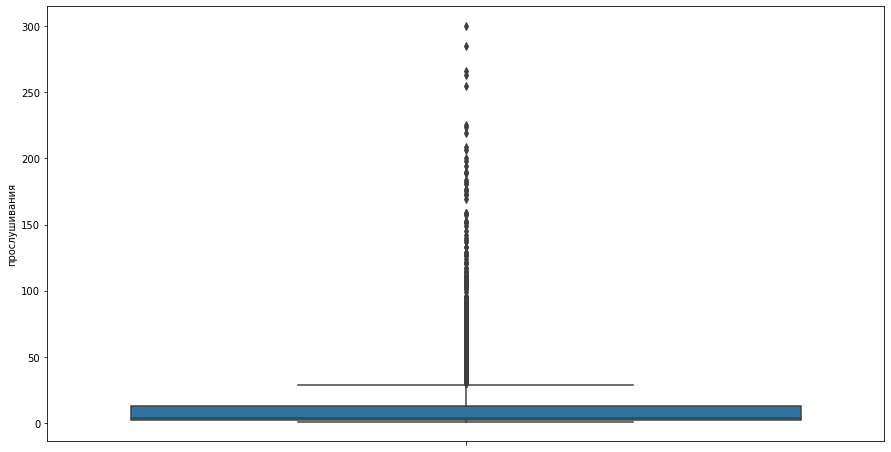

In [270]:
fig, ax = pyplot.subplots(figsize=(15,8))
ax = sns.boxplot(y='my_scrobbles', data=df)
ax.set( ylabel='прослушивания')
plt.show()

In [934]:
# распределение прослушиваний (скробблов)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


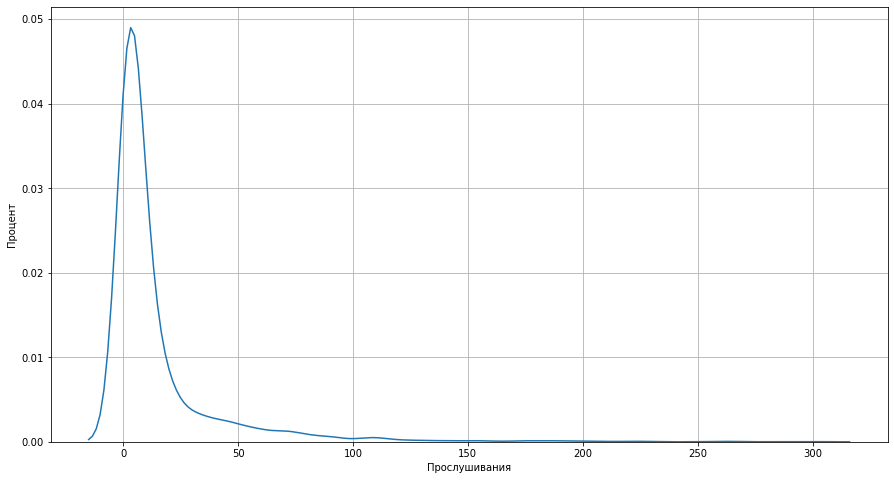

In [271]:
fig, ax = pyplot.subplots(figsize=(15,8))
ax = sns.distplot(a=df_new['my_scrobbles'], hist=False, kde=True, rug=False)
ax.set(xlabel = 'Прослушивания',  ylabel='Процент')
plt.grid(True)

In [935]:
# логарифмизация для лучшего обзора картины

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


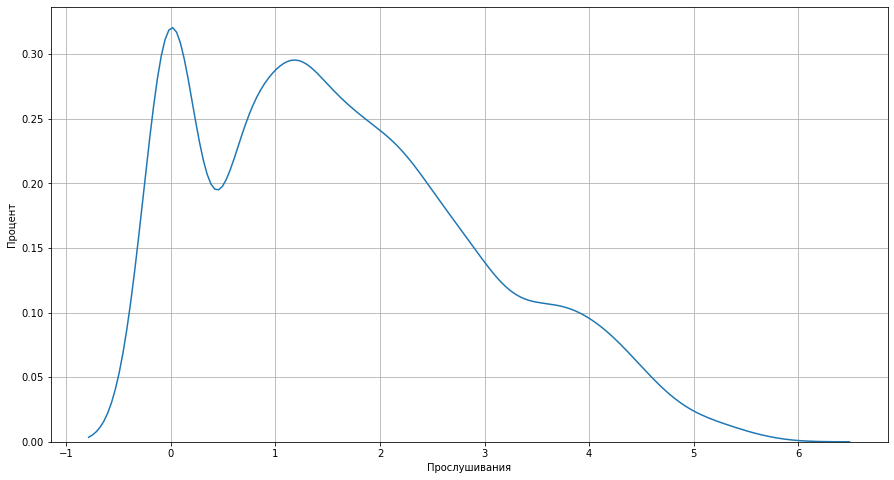

In [272]:
fig, ax = pyplot.subplots(figsize=(15,8))
ax = sns.distplot(a=np.log(df_new['my_scrobbles']), hist=False, kde=True, rug=False)
ax.set(xlabel = 'Прослушивания',  ylabel='Процент')
plt.grid(True)

In [936]:
# гистограмма для представления в виде классов

<AxesSubplot:>

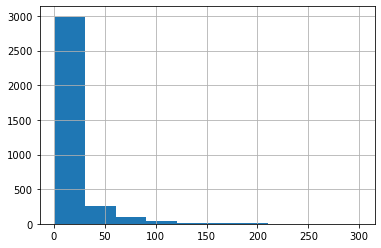

In [280]:
df['my_scrobbles'].hist()

In [282]:
df['my_scrobbles'].describe()

count    3440.000000
mean       14.357267
std        27.308922
min         1.000000
25%         2.000000
50%         4.000000
75%        13.000000
max       300.000000
Name: my_scrobbles, dtype: float64

In [ ]:
# Прослушивания в зависимости от жанра

[Text(0.5, 0, 'Жанр'), Text(0, 0.5, 'Прослушивания')]

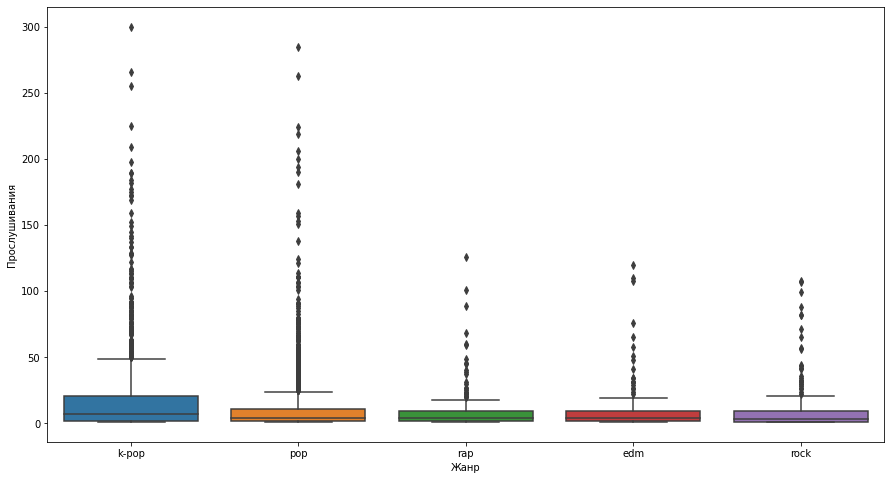

In [273]:
fig, ax = pyplot.subplots(figsize=(15,8))
ax = sns.boxplot(x="ganre",y="my_scrobbles", data=df)
ax.set(xlabel = 'Жанр',  ylabel='Прослушивания')

In [ ]:
# Прослушивания в зависимости от страны

[Text(0.5, 0, 'Страна'), Text(0, 0.5, 'Прослушивания')]

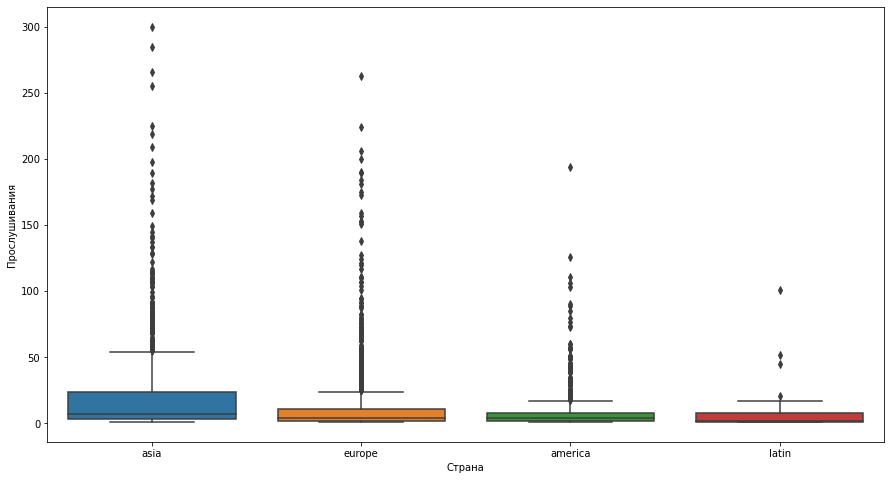

In [275]:
fig, ax = pyplot.subplots(figsize=(15,8))
ax = sns.boxplot(x="country",y="my_scrobbles", data=df)
ax.set(xlabel = 'Страна',  ylabel='Прослушивания')

In [ ]:
# Прослушивания в зависимости от типа исполнителя

[Text(0.5, 0, 'Тип'), Text(0, 0.5, 'Прослушивания')]

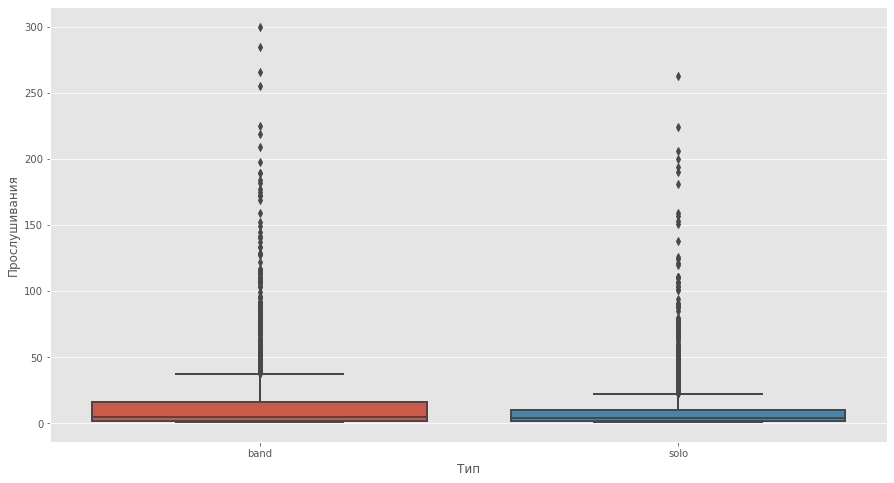

In [921]:
fig, ax = pyplot.subplots(figsize=(15,8))
ax = sns.boxplot(x="group",y="my_scrobbles", data=df)
ax.set(xlabel = 'Тип',  ylabel='Прослушивания')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


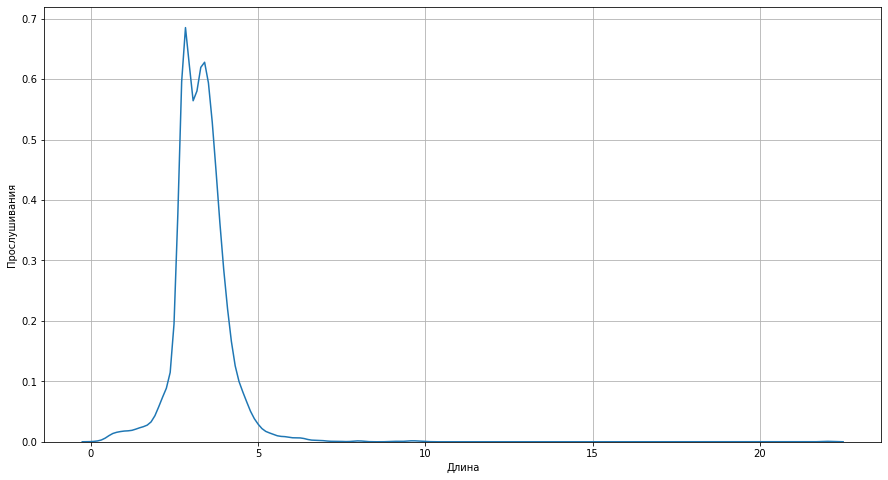

In [278]:
fig, ax = pyplot.subplots(figsize=(15,8))
ax = sns.distplot(df_new['length'], hist=False, kde=True, rug=False)
ax.set(xlabel = 'Длина',  ylabel='Прослушивания')
plt.grid(True)

In [283]:
from sklearn import preprocessing

In [520]:
df_new1 = copy.deepcopy(df)

In [937]:
# первоначальное черновое распределение по категориям

In [521]:
df_new1.loc[df_new['my_scrobbles'] < 3, 'rate'] = "not interested"
df_new1.loc[(df_new['my_scrobbles'] >= 3) & (df_new1['my_scrobbles'] < 14), 'rate'] = "listenable"
df_new1.loc[(df_new['my_scrobbles'] >= 14) & (df_new1['my_scrobbles'] < 55), 'rate'] = "loved"
df_new1.loc[(df_new['my_scrobbles'] >= 55), 'rate'] = "obsessed"

In [522]:
no = df_new1[(df_new1.rate == "not interested")].count()['song'] / len(df_new1)
listenable = df_new1[(df_new1.rate == "listenable")].count()['song'] / len(df_new1)
loved = df_new1[(df_new1.rate == "loved")].count()['song'] / len(df_new1)
obsessed = df_new1[(df_new1.rate == "obsessed")].count()['song'] / len(df_new1)

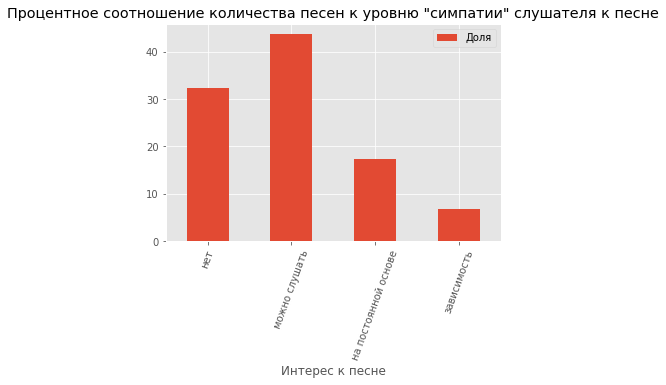

In [523]:
df_rate = pd.DataFrame({'Интерес к песне':['нет', 'можно слушать', 'на постоянной основе', 'зависимость'], 'Доля':[no*100, listenable*100, loved*100, obsessed*100]}) 
df_rate.plot.bar(x='Интерес к песне', y='Доля', rot=70, title='Процентное соотношение количества песен к уровню "симпатии" слушателя к песне')
plt.show()

# Работа с категориальными данными

# Вариант 1. label_encoder

In [938]:
# В работе рассматриваю два варианта - label_encoder и one-hot encoder. Качество моделей меняется в зависимости от метода кодирования

In [524]:
import sklearn

In [939]:
# кодирования класса "симпатии" к треку

{0: 'listenable', 1: 'loved', 2: 'not interested', 3: 'obsessed'}


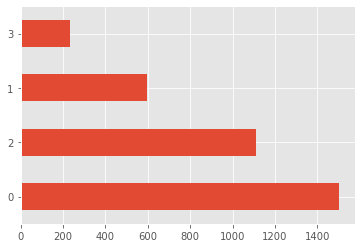

In [525]:
label_encoder = sklearn.preprocessing.LabelEncoder()
mapped_category = pd.Series(label_encoder.fit_transform(df_new1['rate']))
mapped_category.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

In [526]:
df_new1['rate'] = label_encoder.fit_transform(df_new1['rate'])
df_new1.head()

,song,artist,my_scrobbles,song_listeners,song_scrobbles,length,ganre,country,age,group,artist_listeners,artist_scrobbles,rate
0,ME,CLC,300,40027.0,698156.0,3.216667,k-pop,asia,5,band,119335.0,7770919.0,3
1,How You Like That,BLACKPINK,285,212296.0,7340320.0,3.016667,pop,asia,4,band,443371.0,59627899.0,3
2,Intro,Dreamcatcher,266,19725.0,317401.0,1.516667,k-pop,asia,4,band,121882.0,11246773.0,3
3,Why Not?,Loona,263,58439.0,1241097.0,2.787796,pop,europe,46,solo,285599.0,17462658.0,3
4,La Vie en Rose,IZ*ONE,255,65972.0,1521104.0,3.633333,k-pop,asia,2,band,103163.0,12020127.0,3


In [940]:
# кодирования жанра

{0: 'edm', 1: 'k-pop', 2: 'pop', 3: 'rap', 4: 'rock'}


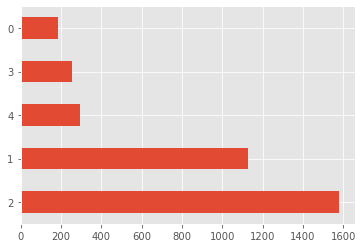

In [527]:
label_encoder = sklearn.preprocessing.LabelEncoder()
mapped_category = pd.Series(label_encoder.fit_transform(df_new1['ganre']))
mapped_category.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

In [528]:
df_new1['ganre'] = label_encoder.fit_transform(df_new1['ganre'])
df_new1.head()

,song,artist,my_scrobbles,song_listeners,song_scrobbles,length,ganre,country,age,group,artist_listeners,artist_scrobbles,rate
0,ME,CLC,300,40027.0,698156.0,3.216667,1,asia,5,band,119335.0,7770919.0,3
1,How You Like That,BLACKPINK,285,212296.0,7340320.0,3.016667,2,asia,4,band,443371.0,59627899.0,3
2,Intro,Dreamcatcher,266,19725.0,317401.0,1.516667,1,asia,4,band,121882.0,11246773.0,3
3,Why Not?,Loona,263,58439.0,1241097.0,2.787796,2,europe,46,solo,285599.0,17462658.0,3
4,La Vie en Rose,IZ*ONE,255,65972.0,1521104.0,3.633333,1,asia,2,band,103163.0,12020127.0,3


In [941]:
# кодирование типа исполнителя

{0: 'band', 1: 'solo'}


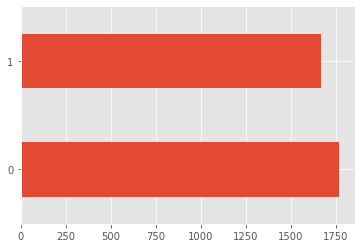

In [529]:
label_encoder = sklearn.preprocessing.LabelEncoder()
mapped_category = pd.Series(label_encoder.fit_transform(df_new1['group']))
mapped_category.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

In [530]:
df_new1['group'] = label_encoder.fit_transform(df_new1['group'])
df_new1.head()

,song,artist,my_scrobbles,song_listeners,song_scrobbles,length,ganre,country,age,group,artist_listeners,artist_scrobbles,rate
0,ME,CLC,300,40027.0,698156.0,3.216667,1,asia,5,0,119335.0,7770919.0,3
1,How You Like That,BLACKPINK,285,212296.0,7340320.0,3.016667,2,asia,4,0,443371.0,59627899.0,3
2,Intro,Dreamcatcher,266,19725.0,317401.0,1.516667,1,asia,4,0,121882.0,11246773.0,3
3,Why Not?,Loona,263,58439.0,1241097.0,2.787796,2,europe,46,1,285599.0,17462658.0,3
4,La Vie en Rose,IZ*ONE,255,65972.0,1521104.0,3.633333,1,asia,2,0,103163.0,12020127.0,3


In [942]:
# кодирование страны

{0: 'america', 1: 'asia', 2: 'europe', 3: 'latin'}


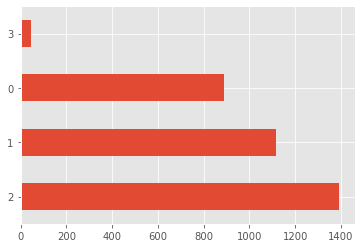

In [531]:
label_encoder = sklearn.preprocessing.LabelEncoder()
mapped_category = pd.Series(label_encoder.fit_transform(df_new1['country']))
mapped_category.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

In [532]:
df_new1['country'] = label_encoder.fit_transform(df_new1['country'])
df_new1.head()

,song,artist,my_scrobbles,song_listeners,song_scrobbles,length,ganre,country,age,group,artist_listeners,artist_scrobbles,rate
0,ME,CLC,300,40027.0,698156.0,3.216667,1,1,5,0,119335.0,7770919.0,3
1,How You Like That,BLACKPINK,285,212296.0,7340320.0,3.016667,2,1,4,0,443371.0,59627899.0,3
2,Intro,Dreamcatcher,266,19725.0,317401.0,1.516667,1,1,4,0,121882.0,11246773.0,3
3,Why Not?,Loona,263,58439.0,1241097.0,2.787796,2,2,46,1,285599.0,17462658.0,3
4,La Vie en Rose,IZ*ONE,255,65972.0,1521104.0,3.633333,1,1,2,0,103163.0,12020127.0,3


In [312]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [943]:
# корреляционная матрица

<AxesSubplot:>

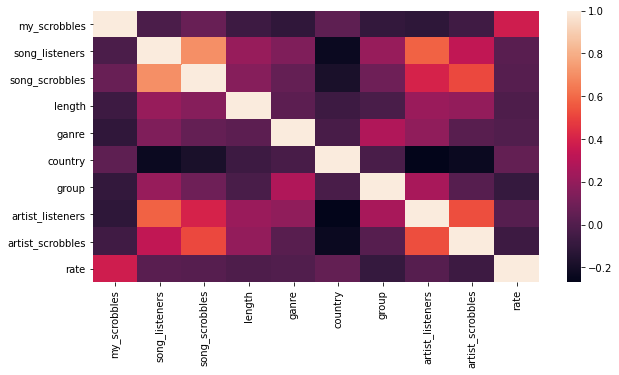

In [313]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(df_new.corr(), ax=ax)

In [944]:
# рафики зависимостей

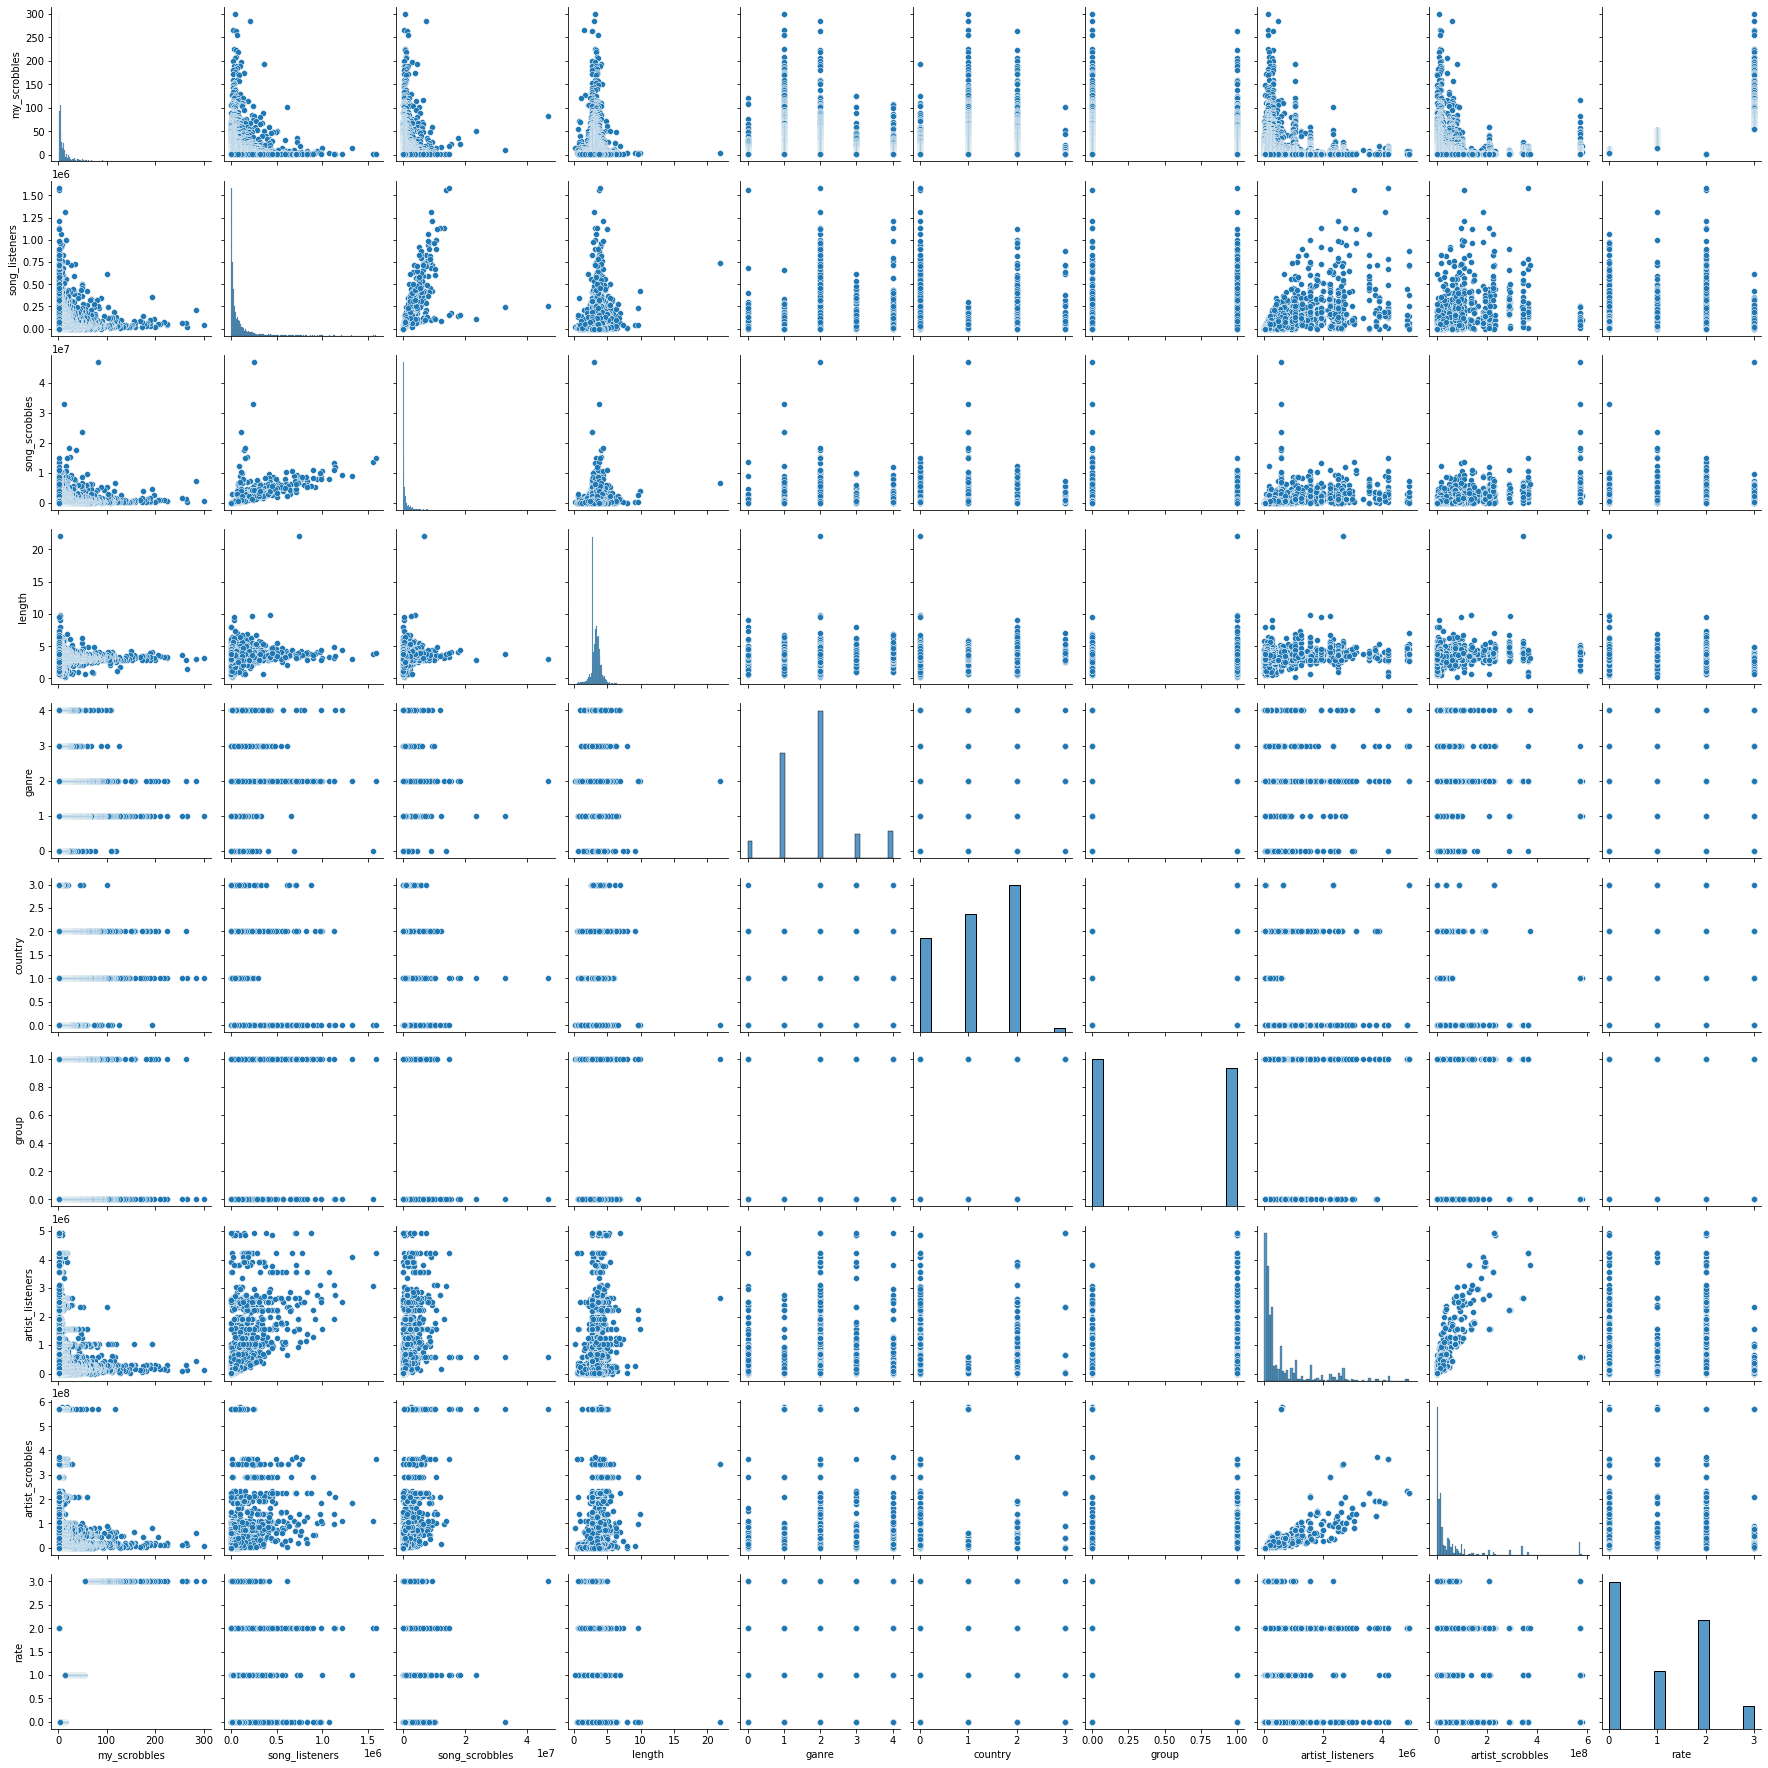

In [315]:
sns.pairplot(data=df_new)

# Кластеризация

In [316]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
matplotlib.style.use('ggplot')

In [945]:
# удаляем строковые переменные, а также rate т.к. это уже готовая классификация

In [571]:
df_cluster = df_new1.drop(['song','artist','rate'], axis=1)

In [946]:
# логарифмируем для удобства

In [572]:
df_cluster['artist_scrobbles'] = np.log(df_cluster['artist_scrobbles'])
df_cluster['song_scrobbles'] =  np.log(df_cluster['song_scrobbles'])
df_cluster['song_listeners'] =  np.log(df_cluster['song_listeners'])
df_cluster['artist_listeners'] = np.log(df_cluster['artist_listeners'])
df_cluster['my_scrobbles'] =  np.log(df_cluster['my_scrobbles'])

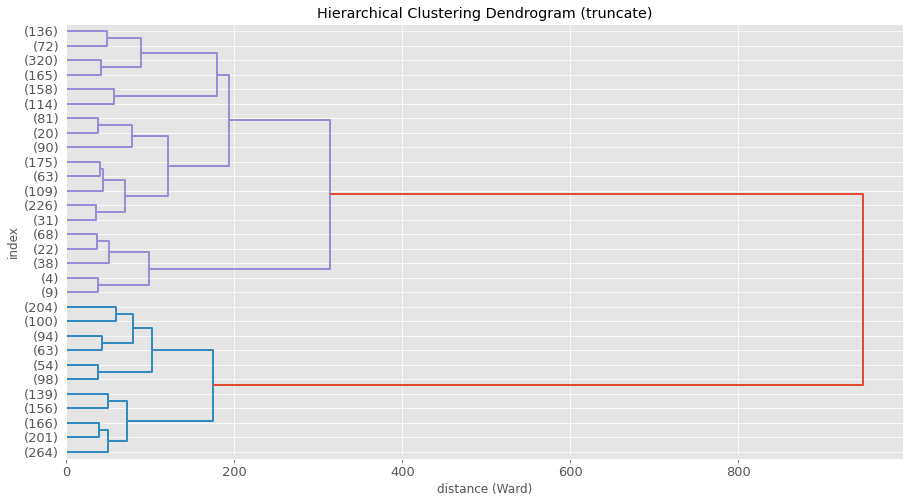

In [433]:
link = linkage(df_cluster, 'ward', 'euclidean')
matplotlib.rcParams['lines.linewidth'] = 2

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

dn = dendrogram(link,
                labels=df.index.tolist(),
                truncate_mode='lastp',
                orientation = "right",
                )
ax.tick_params(labelsize=13)
plt.title('Hierarchical Clustering Dendrogram (truncate)')
plt.ylabel('index')
plt.xlabel('distance (Ward)')
plt.show()

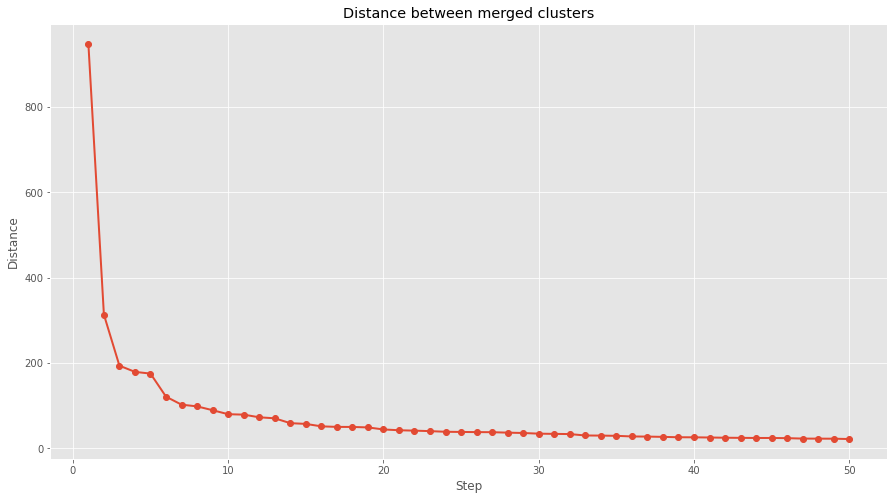

In [434]:
dist = link[-50:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')

plt.show()

In [947]:
# далее рассматриваются два критических варианта - 6 кластеров и 4 кластера (3 кластера не подходят, т.к. у них очень плохое распределение по количеству треков в кластере)

In [440]:
df_cluster['cluster'] = fcluster(link, 6, criterion='maxclust')
df_cluster.groupby('cluster').mean()

,my_scrobbles,song_listeners,song_scrobbles,length,ganre,country,group,artist_listeners,artist_scrobbles
cluster,,,,,,,,,
1,2.135831,9.431870,11.702108,3.182682,1.385529,1.092873,0.000000,11.617642,15.880933
2,1.348327,9.903754,12.231773,3.439372,1.701468,1.469821,0.014682,12.114403,16.549095
3,2.485237,9.540850,11.495504,3.254664,1.773050,1.425532,0.751773,12.892595,16.478951
4,1.266987,8.818173,10.642697,3.098292,1.982390,1.444025,0.914465,11.041882,14.280884
5,1.350722,12.285943,14.596384,3.830075,2.025735,0.720588,0.981618,14.630930,18.869254
6,1.798538,11.426311,13.613321,3.337749,2.194805,0.829726,0.808081,13.375707,17.328044


In [441]:
df_cluster.groupby('cluster').size()

cluster
1    926
2    613
3    141
4    795
5    272
6    693
dtype: int64

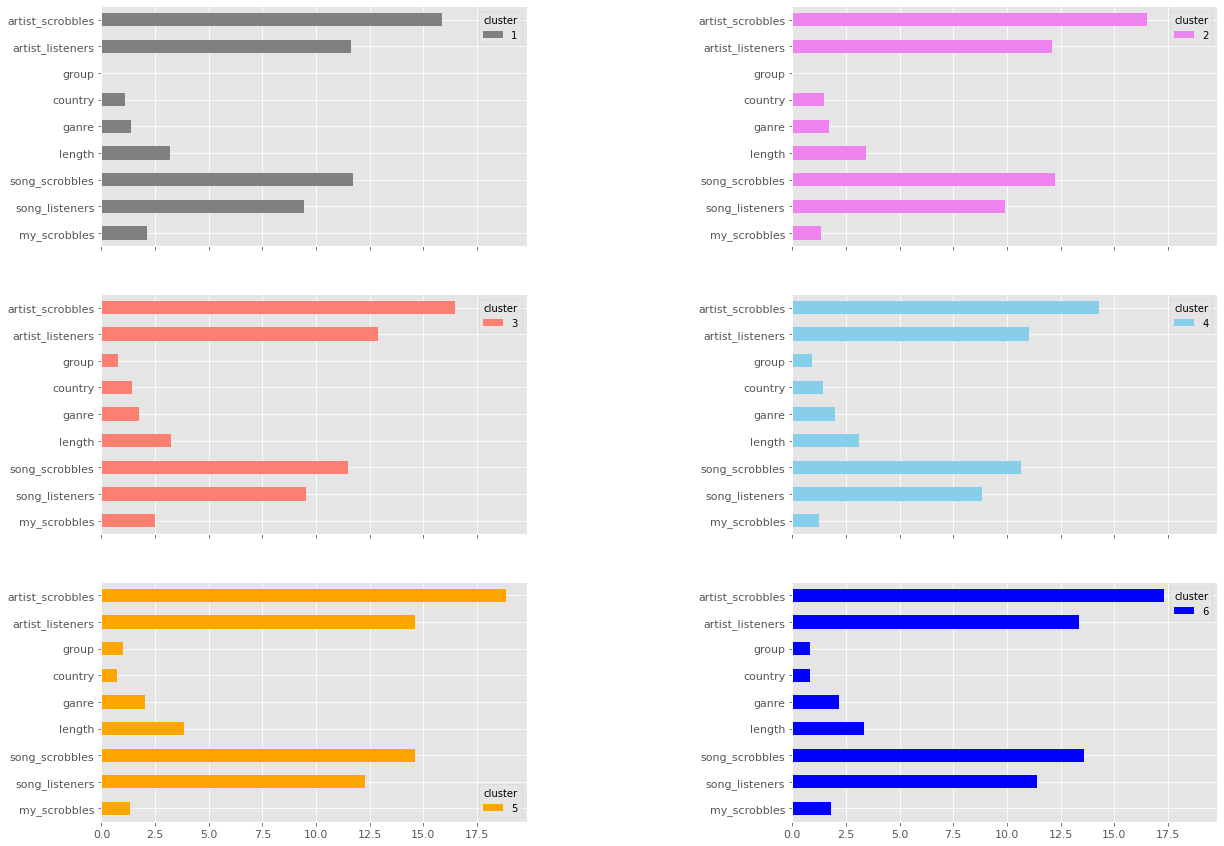

In [445]:
fig, axs = plt.subplots(nrows=3, ncols=2, sharex=True)
fig.set_size_inches(20, 15)
plt.subplots_adjust( wspace=0.625)
k = 0
c = ['grey', 'violet', 'salmon', 'skyblue', 'orange', 'blue']
for i in range(3):
    for j in range(2):
        ax = axs[i,j]
        k += 1
        df_cluster[df_cluster.cluster == k].groupby('cluster').mean().T.plot.barh(ax = ax, color = c[k-1])
        ax.tick_params(labelsize = 11)

•	Кластер 1 описывает что-то похожее на классические треки жанра k-pop с исполнителями-группами и небольшой длиной трека. Пользователь в них весьма заинтересован.
•	Кластер 2 в целом схож с кластером один, за исключением «жанровости» - данные треки можно больше отнести к жанру pop, пользователь менее заинтересован в этих треках.
•	Кластер 3 описывает отношение к трекам жанров pop и rap. Здесь должны быть треки «чартов», что имеют широкую популярность
•	Кластер 4 практически полностью дублирует кластер 3 за изменением типа исполнителя – почти стопроцентный соло.
•	Кластер 5 – соло-исполнители из стран америки в жанре rap.
•	Кластер 6 – почти полностью дублирует кластер 5 за исключением того, что жанр больше приближен к rock.


In [948]:
# в целом, это не лучший вариант кластеризации, так как кластеры повторяют друг друга. Рассмотрим 4 кластера:

In [573]:
df_cluster['cluster'] = fcluster(link, 4, criterion='maxclust')
df_cluster.groupby('cluster').mean()

,my_scrobbles,song_listeners,song_scrobbles,length,ganre,country,group,artist_listeners,artist_scrobbles
cluster,,,,,,,,,
1,1.822160,9.619826,11.913079,3.284924,1.511371,1.243015,0.005848,11.815507,16.147069
2,2.485237,9.540850,11.495504,3.254664,1.773050,1.425532,0.751773,12.892595,16.478951
3,1.266987,8.818173,10.642697,3.098292,1.982390,1.444025,0.914465,11.041882,14.280884
4,1.672314,11.668611,13.890412,3.476518,2.147150,0.798964,0.856995,13.729511,17.762457


In [574]:
df_cluster.groupby('cluster').size()

cluster
1    1539
2     141
3     795
4     965
dtype: int64

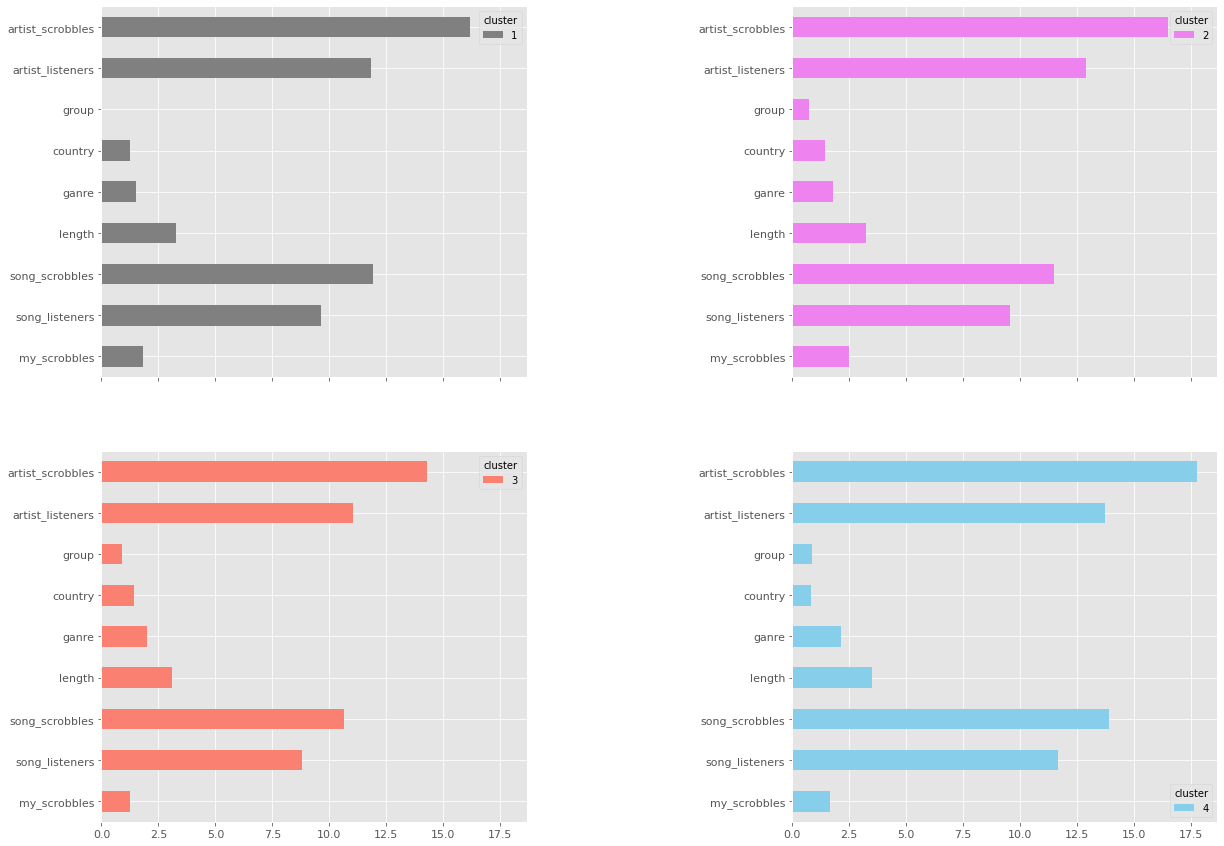

In [577]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
fig.set_size_inches(20, 15)
plt.subplots_adjust( wspace=0.625)
k = 0
c = ['grey', 'violet', 'salmon', 'skyblue', 'orange']
for i in range(2):
    for j in range(2):
        ax = axs[i,j]
        k += 1
        df_cluster[df_cluster.cluster == k].groupby('cluster').mean().T.plot.barh(ax = ax, color = c[k-1])
        ax.tick_params(labelsize = 11)

•	Кластер 1 описывает что-то похожее на классические треки жанра k-pop с исполнителями-группами и небольшой длиной трека. Пользователь в них весьма заинтересован.
•	Кластер 2 – соло-исполнители и группы из различных стран в жанрах pop, пользователь очень в них заинтересован.
•	Кластер 3 – соло-исполнители скорее всего в жанре rap и pop, могут относиться к европейским странам. Это не чартовая музыка для узкого круга слушателей. Пользователь чуть менее заинтересован в такой музыке.
•	Кластер 4 относит данные к трекам с большим уклоном от pop к другим жанрам, а страны – скорее всего америка и европа. Пользователь в них заинтересован средне.

In [949]:
# этот вариант кластеризации гораздо лучше, плюс он объясняет выбросы.

In [950]:
# несмотря на это попробуем построить модели и по 6 кластерам, и по 4 кластерам

In [534]:
df_new2 = copy.deepcopy(df)
df_new2.loc[df_new2['my_scrobbles'] < 3, 'rate'] = "not interested"
df_new2.loc[(df_new2['my_scrobbles'] >= 3) & (df_new2['my_scrobbles'] < 8), 'rate'] = "normal"
df_new2.loc[(df_new2['my_scrobbles'] >= 8) & (df_new2['my_scrobbles'] < 14), 'rate'] = "listenable"
df_new2.loc[(df_new2['my_scrobbles'] >= 14) & (df_new2['my_scrobbles'] < 55), 'rate'] = "regular"
df_new2.loc[(df_new2['my_scrobbles'] >= 55) & (df_new2['my_scrobbles'] < 110), 'rate'] = "loved"
df_new2.loc[(df_new2['my_scrobbles'] >= 110), 'rate'] = "obsessed"

In [535]:
no = df_new2[(df_new2.rate == "not interested")].count()['song'] / len(df_new2)
normal = df_new2[(df_new2.rate == "normal")].count()['song'] / len(df_new2)
listenable = df_new2[(df_new2.rate == "listenable")].count()['song'] / len(df_new2)
regular = df_new2[(df_new2.rate == "regular")].count()['song'] / len(df_new2)
loved = df_new2[(df_new2.rate == "loved")].count()['song'] / len(df_new2)
obsessed = df_new2[(df_new2.rate == "obsessed")].count()['song'] / len(df_new2)

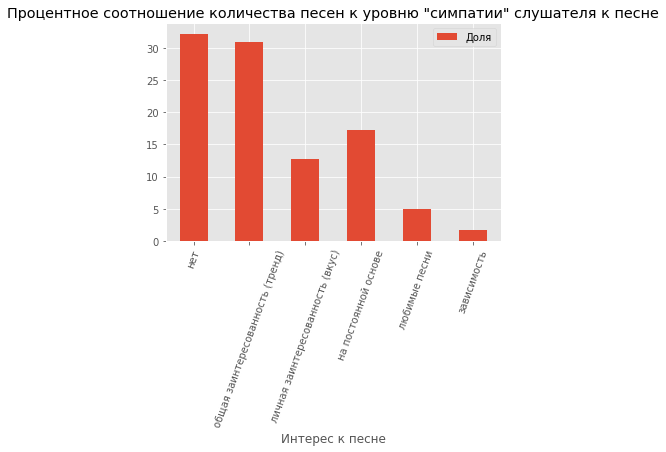

In [536]:
df_rate = pd.DataFrame({'Интерес к песне':['нет', 'общая заинтересованность (тренд)', 'личная заинтересованность (вкус)', 'на постоянной основе', 'любимые песни', 'зависимость'], 'Доля':[no*100,normal*100, listenable*100,regular*100, loved*100, obsessed*100]}) 
df_rate.plot.bar(x='Интерес к песне', y='Доля', rot=70, title='Процентное соотношение количества песен к уровню "симпатии" слушателя к песне')
plt.show()

In [537]:
label_encoder = sklearn.preprocessing.LabelEncoder()
df_new2['rate'] = label_encoder.fit_transform(df_new2['rate'])
df_new2['ganre'] = label_encoder.fit_transform(df_new2['ganre'])
df_new2['group'] = label_encoder.fit_transform(df_new2['group'])
df_new2['country'] = label_encoder.fit_transform(df_new2['country'])
df_new2.head()

,song,artist,my_scrobbles,song_listeners,song_scrobbles,length,ganre,country,age,group,artist_listeners,artist_scrobbles,rate
0,ME,CLC,300,40027.0,698156.0,3.216667,1,1,5,0,119335.0,7770919.0,4
1,How You Like That,BLACKPINK,285,212296.0,7340320.0,3.016667,2,1,4,0,443371.0,59627899.0,4
2,Intro,Dreamcatcher,266,19725.0,317401.0,1.516667,1,1,4,0,121882.0,11246773.0,4
3,Why Not?,Loona,263,58439.0,1241097.0,2.787796,2,2,46,1,285599.0,17462658.0,4
4,La Vie en Rose,IZ*ONE,255,65972.0,1521104.0,3.633333,1,1,2,0,103163.0,12020127.0,4


# 3. Прогнозирование для модели с 6 классами

In [538]:
df_models = df_new2.drop(['song','artist','my_scrobbles'], axis=1)

In [539]:
df_models['artist_scrobbles'] = np.log(df_models['artist_scrobbles'])
df_models['song_scrobbles'] =  np.log(df_models['song_scrobbles'])
df_models['song_listeners'] =  np.log(df_models['song_listeners'])
df_models['artist_listeners'] = np.log(df_models['artist_listeners'])

In [540]:
X = df_models.drop('rate', axis = True).values
y = df_models['rate'].values

In [541]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                          random_state=17)
print(X_train.shape, X_test.shape)

(2408, 9) (1032, 9)


In [542]:
from sklearn.preprocessing import StandardScaler

In [543]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN 

In [544]:
from sklearn.neighbors import KNeighborsClassifier

In [545]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [546]:
from sklearn.metrics import classification_report

In [547]:
predict_knn = knn.predict(X_test_scaled)
print(classification_report(y_test, predict_knn))

              precision    recall  f1-score   support

           0       0.23      0.23      0.23       137
           1       0.25      0.20      0.22        49
           2       0.40      0.50      0.45       309
           3       0.56      0.50      0.53       343
           4       0.57      0.25      0.35        16
           5       0.35      0.31      0.33       178

    accuracy                           0.41      1032
   macro avg       0.39      0.33      0.35      1032
weighted avg       0.42      0.41      0.41      1032



In [548]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [549]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 30)}
knn_grid = GridSearchCV(knn_pipe, knn_params,
                         cv=5, n_jobs=-1,
                        verbose=True)

In [550]:
knn_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:    1.2s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1, param_grid={'knn__n_neighbors': range(1, 30)},
             verbose=True)

In [551]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 7}, 0.4356182227551522)

In [552]:
from sklearn.metrics import accuracy_score

In [553]:
accuracy_score(y_test, knn_grid.predict(X_test_scaled))

0.43507751937984496

In [554]:
print(classification_report(y_test, knn_grid.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.22      0.19      0.20       137
           1       0.34      0.24      0.29        49
           2       0.41      0.52      0.46       309
           3       0.58      0.54      0.56       343
           4       0.22      0.12      0.16        16
           5       0.40      0.36      0.38       178

    accuracy                           0.44      1032
   macro avg       0.36      0.33      0.34      1032
weighted avg       0.43      0.44      0.43      1032



In [951]:
# Качество модели - 43,5%, что не очень много

# Логистическая регрессия

In [555]:
from sklearn.linear_model import LogisticRegression

In [556]:
logit = LogisticRegression()
logit.fit(X_train_scaled, y_train)
predict_logit = logit.predict(X_test_scaled)
print(classification_report(y_test, predict_logit))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       137
           1       0.00      0.00      0.00        49
           2       0.34      0.55      0.42       309
           3       0.46      0.51      0.48       343
           4       0.00      0.00      0.00        16
           5       0.31      0.25      0.28       178

    accuracy                           0.38      1032
   macro avg       0.18      0.22      0.20      1032
weighted avg       0.31      0.38      0.33      1032



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [557]:
grid = {"C":range(1, 19), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_scaled,y_train)

print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

tuned hyperparameters :(best parameters)  {'C': 4, 'penalty': 'l2'}
accuracy : 0.40573478561549103


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [558]:
predict_logreg = logreg_cv.predict(X_test_scaled)
print(classification_report(y_test, predict_logreg))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       137
           1       1.00      0.02      0.04        49
           2       0.34      0.56      0.42       309
           3       0.47      0.51      0.49       343
           4       0.00      0.00      0.00        16
           5       0.31      0.26      0.28       178

    accuracy                           0.38      1032
   macro avg       0.35      0.22      0.20      1032
weighted avg       0.36      0.38      0.34      1032



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [952]:
# Качество модели еще ниже, чем у KNN

# Метод опорных векторов

In [559]:
from sklearn import svm

In [560]:
clf = svm.SVC(kernel='linear', C=10.0)
clf.fit(X_train_scaled, y_train)
predict_clf = clf.predict(X_test_scaled)
print(classification_report(y_test, predict_clf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       137
           1       0.00      0.00      0.00        49
           2       0.32      0.67      0.43       309
           3       0.45      0.45      0.45       343
           4       0.00      0.00      0.00        16
           5       0.27      0.06      0.10       178

    accuracy                           0.36      1032
   macro avg       0.17      0.20      0.16      1032
weighted avg       0.29      0.36      0.30      1032



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [561]:
from sklearn.svm import SVC

In [562]:
clf2 = SVC(kernel="linear")

In [563]:
from sklearn.model_selection import cross_val_score, KFold

In [564]:
params_grid = {'C': range(1, 19)}
cv = KFold(5, shuffle = True, random_state = 1)
grid = GridSearchCV(clf2, params_grid, cv = cv, n_jobs = -1, return_train_score = True)

In [565]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': range(1, 19)}, return_train_score=True)

In [566]:
grid.best_params_

{'C': 12}

In [567]:
predict_clf = grid.predict(X_test_scaled)
print(classification_report(y_test, predict_clf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       137
           1       0.00      0.00      0.00        49
           2       0.32      0.67      0.43       309
           3       0.45      0.45      0.45       343
           4       0.00      0.00      0.00        16
           5       0.27      0.06      0.10       178

    accuracy                           0.36      1032
   macro avg       0.17      0.20      0.16      1032
weighted avg       0.29      0.36      0.30      1032



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [953]:
# Качество модели только падает

# Random forest

In [582]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics

In [579]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [580]:
predict_forest = regr.predict(X_test_scaled)

In [583]:
metrics.r2_score(y_test,predict_forest)

-0.0011915656453727053

In [584]:
estimator = RandomForestRegressor()
params_grid = { 
            "n_estimators"      : list(range(1,30)),
            "max_features"      : ["auto", "sqrt", "log2"],
            "bootstrap": [True, False],
            }

In [585]:
grid = GridSearchCV(estimator, params_grid, cv = 5, n_jobs = -1, return_train_score = True)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29]},
             return_train_score=True)

In [589]:
grid.best_params_

{'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 27}

In [596]:
e_pred = grid.predict(X_test_scaled)
print(metrics.r2_score(y_test, e_pred))

-0.052374066193735525


In [954]:
# модель пере - недо- обучилась, так как выдает отрицательный результат для r2

# Прогнозирование для модели с 4 классами

In [597]:
df_models = df_new1.drop(['song','artist','my_scrobbles'], axis=1)

In [598]:
df_models['artist_scrobbles'] = np.log(df_models['artist_scrobbles'])
df_models['song_scrobbles'] =  np.log(df_models['song_scrobbles'])
df_models['song_listeners'] =  np.log(df_models['song_listeners'])
df_models['artist_listeners'] = np.log(df_models['artist_listeners'])

In [599]:
X = df_models.drop('rate', axis = True).values
y = df_models['rate'].values

In [600]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                          random_state=17)
print(X_train.shape, X_test.shape)

(2408, 9) (1032, 9)


In [601]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN 

In [603]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
predict_knn = knn.predict(X_test_scaled)
print(classification_report(y_test, predict_knn))

              precision    recall  f1-score   support

           0       0.50      0.65      0.57       446
           1       0.37      0.32      0.34       178
           2       0.58      0.45      0.51       343
           3       0.53      0.26      0.35        65

    accuracy                           0.50      1032
   macro avg       0.50      0.42      0.44      1032
weighted avg       0.51      0.50      0.49      1032



In [604]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 30)}
knn_grid = GridSearchCV(knn_pipe, knn_params,
                         cv=5, n_jobs=-1,
                        verbose=True)

In [605]:
knn_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 130 out of 145 | elapsed:    3.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:    3.9s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1, param_grid={'knn__n_neighbors': range(1, 30)},
             verbose=True)

In [606]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 3}, 0.5332122738761743)

In [607]:
print(classification_report(y_test, knn_grid.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.50      0.65      0.57       446
           1       0.37      0.28      0.32       178
           2       0.60      0.49      0.54       343
           3       0.50      0.31      0.38        65

    accuracy                           0.51      1032
   macro avg       0.49      0.43      0.45      1032
weighted avg       0.51      0.51      0.50      1032



In [955]:
# Результат незначительно, но выше - 51%

# Логистическая регрессия


In [608]:
logit = LogisticRegression()
logit.fit(X_train_scaled, y_train)
predict_logit = logit.predict(X_test_scaled)
print(classification_report(y_test, predict_logit))

              precision    recall  f1-score   support

           0       0.46      0.78      0.58       446
           1       0.30      0.06      0.09       178
           2       0.53      0.36      0.43       343
           3       0.50      0.11      0.18        65

    accuracy                           0.47      1032
   macro avg       0.45      0.33      0.32      1032
weighted avg       0.46      0.47      0.42      1032



In [609]:
grid = {"C":range(1, 19), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_scaled,y_train)

print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

tuned hyperparameters :(best parameters)  {'C': 1, 'penalty': 'l2'}
accuracy : 0.5054011065006916


In [610]:
predict_logreg = logreg_cv.predict(X_test_scaled)
print(classification_report(y_test, predict_logreg))

              precision    recall  f1-score   support

           0       0.46      0.78      0.58       446
           1       0.30      0.06      0.09       178
           2       0.53      0.36      0.43       343
           3       0.50      0.11      0.18        65

    accuracy                           0.47      1032
   macro avg       0.45      0.33      0.32      1032
weighted avg       0.46      0.47      0.42      1032



In [956]:
# Результат снова ниже, чем у KNN

# Метод опорных векторов


In [611]:
clf = svm.SVC(kernel='linear', C=10.0)
clf.fit(X_train_scaled, y_train)
predict_clf = clf.predict(X_test_scaled)
print(classification_report(y_test, predict_clf))

              precision    recall  f1-score   support

           0       0.45      0.86      0.59       446
           1       0.00      0.00      0.00       178
           2       0.54      0.30      0.38       343
           3       0.00      0.00      0.00        65

    accuracy                           0.47      1032
   macro avg       0.25      0.29      0.24      1032
weighted avg       0.38      0.47      0.38      1032



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [612]:
clf2 = SVC(kernel="linear")

In [613]:
params_grid = {'C': range(1, 19)}
cv = KFold(5, shuffle = True, random_state = 1)
grid = GridSearchCV(clf2, params_grid, cv = cv, n_jobs = -1, return_train_score = True)

In [614]:
grid.fit(X_train_scaled, y_train)
grid.best_params_

{'C': 3}

In [615]:
predict_clf = grid.predict(X_test_scaled)
print(classification_report(y_test, predict_clf))

              precision    recall  f1-score   support

           0       0.45      0.86      0.59       446
           1       0.00      0.00      0.00       178
           2       0.54      0.30      0.38       343
           3       0.00      0.00      0.00        65

    accuracy                           0.47      1032
   macro avg       0.25      0.29      0.24      1032
weighted avg       0.38      0.47      0.38      1032



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [957]:
# Результат сопоставим с прошлым

# Random forest

In [616]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [617]:
predict_forest = regr.predict(X_test_scaled)

In [618]:
metrics.r2_score(y_test,predict_forest)

0.02093474802914319

In [619]:
estimator = RandomForestRegressor()
params_grid = { 
            "n_estimators"      : list(range(1,30)),
            "max_features"      : ["auto", "sqrt", "log2"],
            "bootstrap": [True, False],
            }

In [620]:
grid = GridSearchCV(estimator, params_grid, cv = 5, n_jobs = -1, return_train_score = True)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29]},
             return_train_score=True)

In [621]:
grid.best_params_

{'bootstrap': True, 'max_features': 'log2', 'n_estimators': 26}

In [622]:
e_pred = grid.predict(X_test_scaled)
print(metrics.r2_score(y_test, e_pred))

0.09586511606789472


In [958]:
# Результат уже не отрицательный, но все еще очень плохой

# Вариант 2. One-hot encoder 

In [959]:
# кодируем методом get_dummies

In [648]:
df_new3 = copy.deepcopy(df_new1)

In [649]:
df_new3 = pd.get_dummies(df_new3, columns = ['ganre'])

In [650]:
df_new3 = pd.get_dummies(df_new3, columns = ['country'])

In [651]:
df_new3 = pd.get_dummies(df_new3, columns = ['group'])

In [652]:
df_new3.head()

,song,artist,my_scrobbles,song_listeners,song_scrobbles,length,age,artist_listeners,artist_scrobbles,rate,...,ganre_1,ganre_2,ganre_3,ganre_4,country_0,country_1,country_2,country_3,group_0,group_1
0,ME,CLC,300,40027.0,698156.0,3.216667,5,119335.0,7770919.0,3,...,1,0,0,0,0,1,0,0,1,0
1,How You Like That,BLACKPINK,285,212296.0,7340320.0,3.016667,4,443371.0,59627899.0,3,...,0,1,0,0,0,1,0,0,1,0
2,Intro,Dreamcatcher,266,19725.0,317401.0,1.516667,4,121882.0,11246773.0,3,...,1,0,0,0,0,1,0,0,1,0
3,Why Not?,Loona,263,58439.0,1241097.0,2.787796,46,285599.0,17462658.0,3,...,0,1,0,0,0,0,1,0,0,1
4,La Vie en Rose,IZ*ONE,255,65972.0,1521104.0,3.633333,2,103163.0,12020127.0,3,...,1,0,0,0,0,1,0,0,1,0


In [960]:
# это график зависимостей для предыдущих вариантов

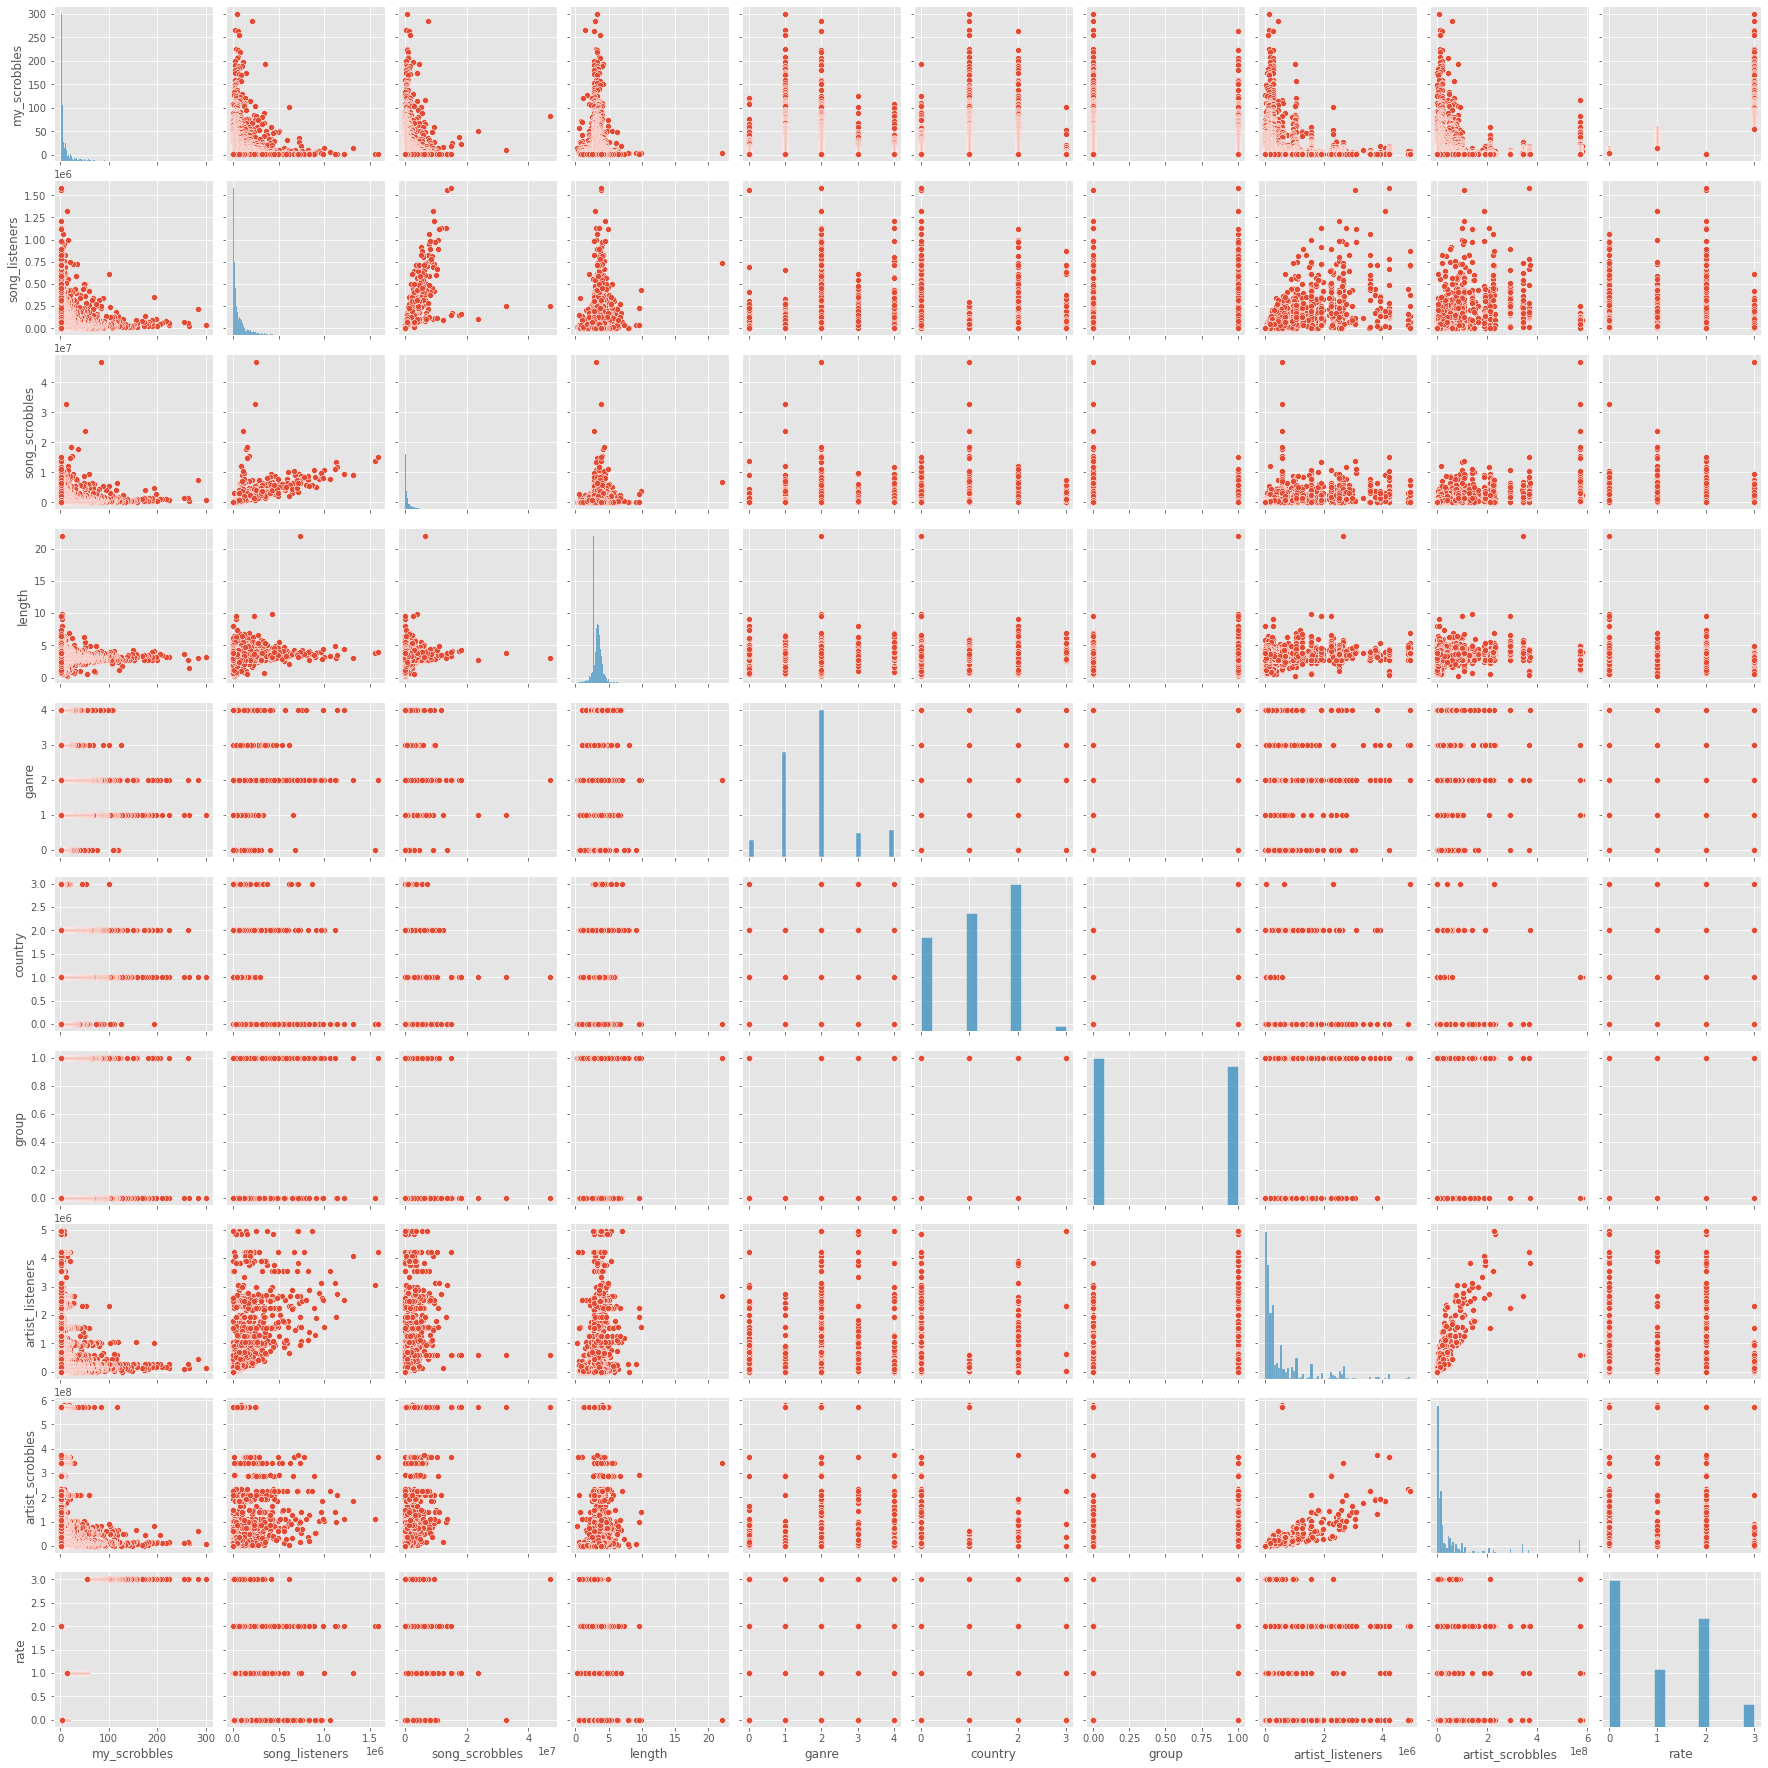

In [628]:
sns.pairplot(data=df_new3)

In [653]:
df_new3['artist_scrobbles'] = np.log(df_new3['artist_scrobbles'])
df_new3['song_scrobbles'] =  np.log(df_new3['song_scrobbles'])
df_new3['song_listeners'] =  np.log(df_new3['song_listeners'])
df_new3['artist_listeners'] = np.log(df_new3['artist_listeners'])

In [744]:
from sklearn.preprocessing import label_binarize

In [654]:
X = df_new3.drop(['my_scrobbles','song','artist','rate'], axis = True).values
y = df_new3['rate'].values

In [961]:
# два варианта целевой переменной - одна закодирована, другая нет 

In [745]:
y_1 = label_binarize(y, classes=[0,1,2,3])

In [746]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                          random_state=17)
print(X_train.shape, X_test.shape)

(2408, 17) (1032, 17)


In [754]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_1, y_test_1 = train_test_split(X, y_1, test_size=0.3,
                                                          random_state=17)
print(X_train.shape, X_test.shape)

(2408, 17) (1032, 17)


In [747]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN 

In [748]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
predict_knn = knn.predict(X_test_scaled)
print(classification_report(y_test, predict_knn))

              precision    recall  f1-score   support

           0       0.55      0.52      0.53       446
           1       0.39      0.25      0.31       178
           2       0.60      0.45      0.51       343
           3       0.56      0.23      0.33        65

   micro avg       0.54      0.43      0.48      1032
   macro avg       0.52      0.36      0.42      1032
weighted avg       0.54      0.43      0.47      1032
 samples avg       0.43      0.43      0.43      1032



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [749]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 30)}
knn_grid = GridSearchCV(knn_pipe, knn_params,
                         cv=5, n_jobs=-1,
                        verbose=True, return_train_score=True)

In [750]:
knn_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   18.4s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1, param_grid={'knn__n_neighbors': range(1, 30)},
             return_train_score=True, verbose=True)

In [751]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 1}, 0.5062111265430767)

In [962]:
# Лучший результат для закодированной целевой переменной - 51%

# Логистическая регрессия

In [755]:
logit = LogisticRegression()
logit.fit(X_train_scaled, y_train_1)
predict_logit = logit.predict(X_test_scaled)
print(classification_report(y_test_1, predict_logit))

              precision    recall  f1-score   support

           0       0.47      0.77      0.58       446
           1       0.20      0.06      0.09       178
           2       0.55      0.37      0.44       343
           3       0.64      0.14      0.23        65

    accuracy                           0.48      1032
   macro avg       0.47      0.34      0.34      1032
weighted avg       0.46      0.48      0.43      1032



In [757]:
grid = {"C":range(1, 19), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_scaled,y_train_1)

print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

tuned hyperparameters :(best parameters)  {'C': 9, 'penalty': 'l2'}
accuracy : 0.5020816044260028


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [758]:
predict_logreg = logreg_cv.predict(X_test_scaled)
print(classification_report(y_test_1, predict_logreg))

              precision    recall  f1-score   support

           0       0.47      0.76      0.58       446
           1       0.23      0.08      0.12       178
           2       0.55      0.37      0.44       343
           3       0.60      0.14      0.22        65

    accuracy                           0.47      1032
   macro avg       0.46      0.34      0.34      1032
weighted avg       0.46      0.47      0.43      1032



In [963]:
# Результат хуже, целевая переменная не закодирована (не хорошо)

# Метод опорных векторов

In [760]:
clf = svm.SVC(kernel='linear', C=10.0)
clf.fit(X_train_scaled, y_train_1)
predict_clf = clf.predict(X_test_scaled)
print(classification_report(y_test_1, predict_clf))

              precision    recall  f1-score   support

           0       0.46      0.86      0.60       446
           1       0.00      0.00      0.00       178
           2       0.57      0.31      0.40       343
           3       0.00      0.00      0.00        65

    accuracy                           0.48      1032
   macro avg       0.26      0.29      0.25      1032
weighted avg       0.38      0.48      0.39      1032



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [761]:
clf2 = SVC(kernel="linear")

In [762]:
params_grid = {'C': range(1, 19)}
cv = KFold(5, shuffle = True, random_state = 1)
grid = GridSearchCV(clf2, params_grid, cv = cv, n_jobs = -1, return_train_score = True)

In [763]:
grid.fit(X_train_scaled, y_train_1)
grid.best_params_

{'C': 10}

In [764]:
predict_clf = grid.predict(X_test_scaled)
print(classification_report(y_test_1, predict_clf))

              precision    recall  f1-score   support

           0       0.46      0.86      0.60       446
           1       0.00      0.00      0.00       178
           2       0.57      0.31      0.40       343
           3       0.00      0.00      0.00        65

    accuracy                           0.48      1032
   macro avg       0.26      0.29      0.25      1032
weighted avg       0.38      0.48      0.39      1032



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [964]:
# Результат чуть лучше, но целевая переменная не закодирована

In [765]:
def plot_grid_scores(grid, param_name):
    fig,ax = plt.subplots(figsize=(10, 10))
    ax.plot(grid.param_grid[param_name], grid.cv_results_['mean_train_score'][np.logical_not(np.isnan(grid.cv_results_['mean_train_score']))], 
           'o-', color='blue', label='train')
    ax.plot(grid.param_grid[param_name], grid.cv_results_['mean_test_score'][np.logical_not(np.isnan(grid.cv_results_['mean_test_score']))], 
           'o-', color='yellow', label='test')
    ax.set_xlabel('parameter C')
    ax.set_ylabel('Mean CV accuracy')
    ax.legend();

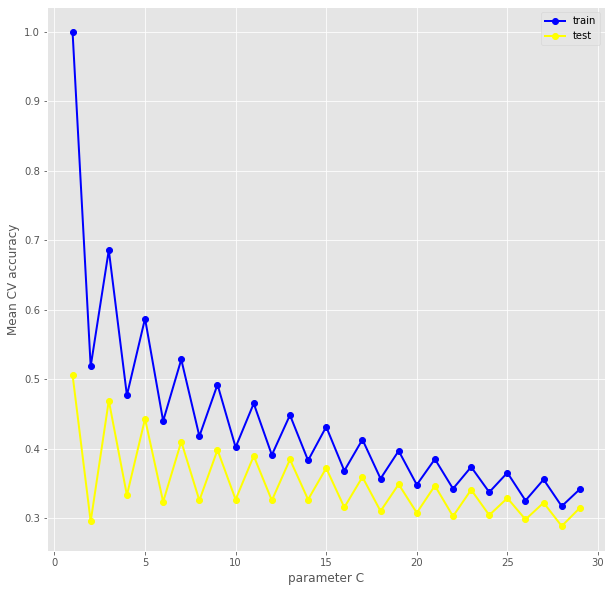

In [766]:
plot_grid_scores(knn_grid, 'knn__n_neighbors')

# Финальный анализ лучшего из вариантов

In [835]:
knn = KNeighborsClassifier(1)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [965]:
# результаты для закодированной целевой переменной и незакодированной соответственно

In [836]:
print('Score on train: ', knn.score(X_train_scaled, y_train))
print('Score on test: ', knn.score(X_test_scaled, y_test))

Score on train:  1.0
Score on test:  0.4806201550387597


In [833]:
knn = KNeighborsClassifier(3)
knn.fit(X_train_scaled, y_train_1)

KNeighborsClassifier(n_neighbors=3)

In [834]:
print('Score on train: ', knn.score(X_train_scaled, y_train_1))
print('Score on test: ', knn.score(X_test_scaled, y_test_1))

Score on train:  0.7412790697674418
Score on test:  0.5174418604651163


In [966]:
# потсроение кривой ROC-AUC

In [710]:
from sklearn.metrics import roc_curve, auc

In [694]:
from sklearn.multiclass import OneVsRestClassifier

In [837]:
clf = OneVsRestClassifier(knn)
y_score = clf.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)

In [839]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i].ravel(),  y_score[:,i].ravel())
    roc_auc[i] = auc(fpr[i], tpr[i])

In [967]:
# кривая выглядит не лучшим образом, так как сам результат модели не хороший

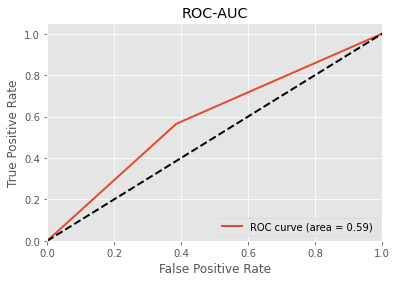

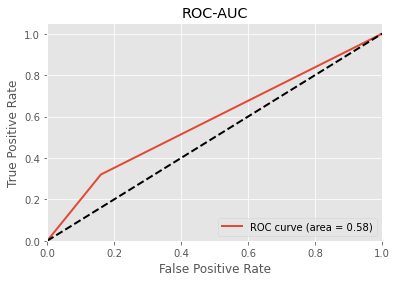

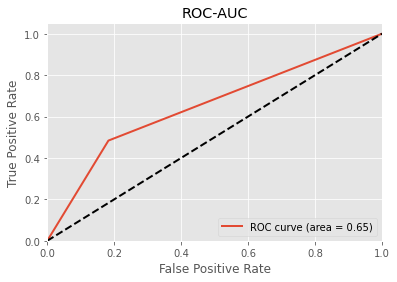

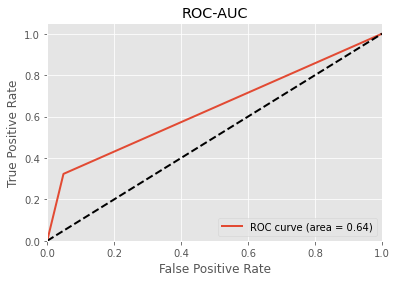

In [840]:
for i in range(4):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC')
    plt.legend(loc="lower right")
    plt.show()

# Предсказание

In [968]:
# Построено по треку, что не прослушивался с использованием las.fm. Оценен пользователем, как понравившийся и приемлемый к прослушиванию

In [917]:
df_pred = pd.DataFrame(np.array([[np.log(25561),np.log(323846),3.56,2,np.log(41603),np.log(1217304),0,1,0,0,0,0,1,0,0,1,0]]),columns=['song_listeners','song_scrobbles','length','age','artist_listeners','artist_scrobbles','ganre_0', 'ganre_1','ganre_2','ganre_3','ganre_4','country_0','country_1','country_2','country_3','group_0','group_1'])

In [918]:
scaler1 = StandardScaler().fit(df_pred)
X_pred = scaler1.transform(df_pred)

In [ ]:
# результат - "На постоянной основе", сопоставим с реальностью.

In [919]:
knn.predict(X_pred)

array([[0, 0, 1, 0]])

# Вариант с Extra Trees

In [970]:
# запасной вариант, впервые строила модель с этим способом, поэтому не внесла в основные

In [842]:
from sklearn.ensemble import ExtraTreesClassifier

In [902]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=1045388471)

In [903]:
clf.fit(X_train_scaled, y_train_1)

ExtraTreesClassifier(random_state=1045388471)

In [904]:
clf.score(X_test_scaled, y_test_1)

0.5513565891472868

In [905]:
params_grid = {'n_estimators': range(0, 100)}
cv = KFold(5, shuffle = True, random_state = 1045388471)
grid = GridSearchCV(clf, params_grid, cv = cv, n_jobs = -1, return_train_score = True)

In [906]:
grid.fit(X_train_scaled, y_train_1)

GridSearchCV(cv=KFold(n_splits=5, random_state=1045388471, shuffle=True),
             estimator=ExtraTreesClassifier(random_state=1045388471), n_jobs=-1,
             param_grid={'n_estimators': range(0, 100)},
             return_train_score=True)

In [907]:
grid.best_params_ , grid.best_score_

({'n_estimators': 58}, 0.5847120021393881)

In [971]:
# результат лучше, чем у KNN, но здесь не закодирована целевая переменная

In [908]:
predict_clf = grid.predict(X_test_scaled)
print(classification_report(y_test_1, predict_clf))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60       446
           1       0.37      0.35      0.36       178
           2       0.62      0.56      0.59       343
           3       0.49      0.38      0.43        65

    accuracy                           0.55      1032
   macro avg       0.51      0.48      0.50      1032
weighted avg       0.55      0.55      0.54      1032



In [972]:
# Предсказание - "Можно слушать", приемлемо

In [920]:
grid.predict(X_pred)

array([0])